# **CNN Basics**

# 1. Motivation: Why CNNs for images (local patterns, spatial hierarchies)

## 🧠 First let us know what CNN is?

A convolutional neural network (CNN) is a category of machine learning  model. Specifically, it is a type of deep learning algorithm that is well suited to analyzing visual data. CNNs are commonly used to process image and video tasks. And, because CNNs are so effective at identifying objects, they are frequently used for computer vision tasks, such as image recognition and object recognition, with common use cases including self-driving cars, facial recognition and medical image analysis.

CNN architecture is inspired by the connectivity patterns of the human brain in particular, the visual cortex, which plays an essential role in perceiving and processing visual stimuli. The artificial neuron in a CNN are arranged to efficiently interpret visual information, enabling these models to process entire images.

CNNs also use principles from linear algebra, particularly convolution operations, to extract features and identify patterns within images. Although CNNs are predominantly used to process images, they can also be adapted to work with audio and other signal data.

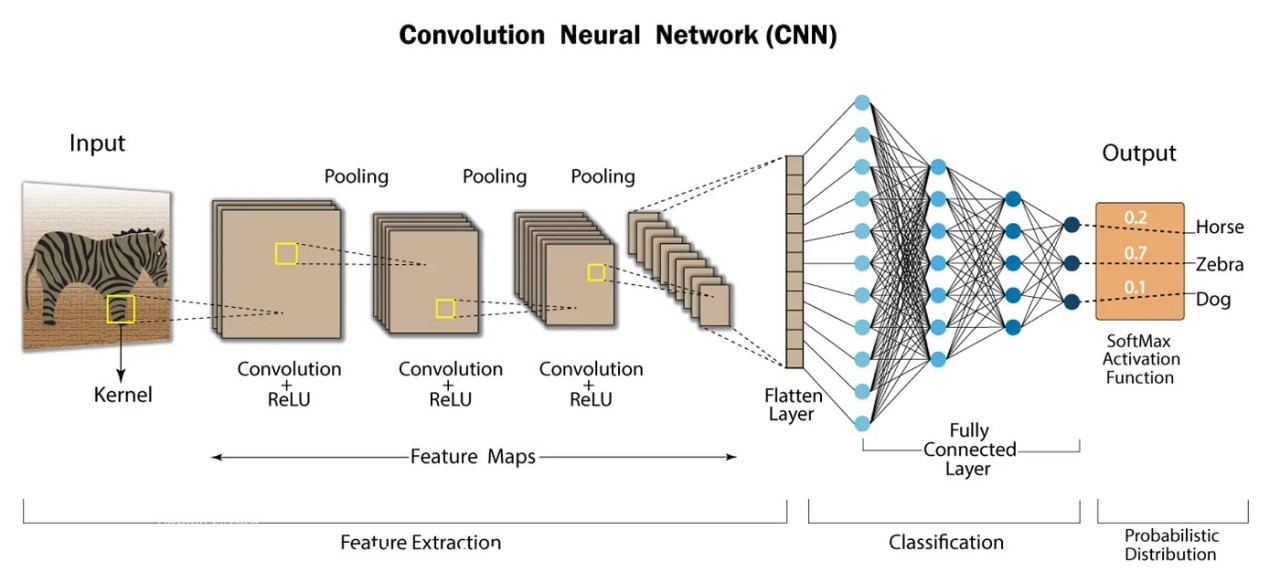

## **1.1 Why CNNs for Images?** 🌟

CNNs are particularly suited for image data due to the following reasons:

                            
### **1.1.1 Images Have Spatial Structure**

- Nearby pixels are strongly correlated.
- CNNs preserve this spatial locality through local receptive fields.
- Dense networks lose this by flattening images into vectors.

👉 CNNs maintain the 2D structure of images.


                            
### **1.1.2 Parameter Reduction via Weight Sharing**

- Without CNNs, an image → fully connected layer requires millions of weights.
- CNNs reuse filters across the whole image, cutting parameter count drastically.

👉 This makes CNNs computationally efficient and easier to train.


### **1.1.3 Automatic Feature Extraction**

- Unlike older methods (SIFT, HOG, manual edge detectors), CNNs learn features directly from data.
- Filters evolve during training to detect useful image structures.
- Hierarchical features allow CNNs to recognize objects at different levels of complexity.

👉 CNNs adapt features to the dataset, removing the need for hand-engineering.


### **1.1.4 Robustness and Invariance**

- Translation invariance: filters detect patterns regardless of location.
- Pooling layers: add robustness to small shifts, rotations, or distortions.
- CNNs focus on what features exist, not where exactly they occur.

👉 This makes CNNs powerful for real-world images, where objects may appear in different positions.


### **1.1.5 Proven Performance in Vision**

- CNNs are the backbone of nearly all modern computer vision tasks:
    - Image classification (e.g., AlexNet, ResNet).
    - Object detection (e.g., YOLO, Faster R-CNN).
    - Image segmentation (e.g., U-Net).
    - Image generation (e.g., GANs, diffusion models).
- They have consistently outperformed both fully connected networks and traditional ML methods (like SVMs with handcrafted features).

👉 CNNs are the state-of-the-art standard for visual recognition.

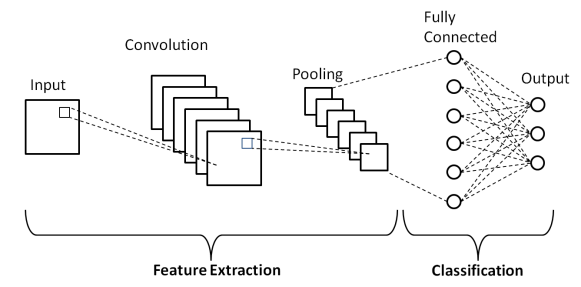

--- 

## **1.2 Motivation: Why CNNs for Images** 🎯

### **1.2.1 The Challenge with Fully Connected Networks**

- Images are high-dimensional data.
    - Example: A 224×224 RGB image = 224 × 224 × 3 = 150,528 features.
    - Feeding this into a dense layer of 1,000 neurons would require 150 million parameters in just the first layer.
- This causes:
    - Excessive computational cost (training becomes slow and memory-heavy).
    - Overfitting risk (too many parameters for the amount of training data).
    - Loss of spatial information (flattening an image ignores pixel neighborhoods).

👉 Dense networks treat each pixel independently, but in reality, pixels form meaningful local patterns.


### **1.2.2 Local Patterns in Images**

- Images are not random collections of pixels they have local correlations:
    - Neighboring pixels often represent parts of the same structure (edges, corners, textures).
- CNNs exploit this by using convolutions (filters/kernels):
    - A small filter (e.g., 3×3, 5×5) slides across the image, detecting local features.
    - The same filter is reused across the image (weight sharing), reducing parameters dramatically.

👉 Convolutions act as pattern detectors for features like edges, lines, or textures.


### **1.2.3 Spatial Hierarchies of Features**

- CNNs learn features at multiple levels:
    - Low-level (early layers): edges, corners, simple textures.
    - Mid-level (middle layers): shapes, motifs, object parts.
    - High-level (deep layers): complete objects (faces, cars, animals).
- This hierarchy mimics the human visual system, which first detects edges and shapes, then integrates them into objects.

👉 CNNs allow automatic feature learning, eliminating the need for hand-crafted features.


### **1.2.4 Advantages Over Dense Networks**

1. Parameter Efficiency
    - CNNs need far fewer weights due to local connectivity and weight sharing.
    - Example: A 3×3 filter has only 9 parameters, compared to millions in a dense layer.
2. Translation Invariance
    - A learned pattern (e.g., an eye) can be recognized anywhere in the image.
3. Better Generalization
    - Fewer parameters and focus on local structures help prevent overfitting.
4. Scalability
    - Can handle large, high-resolution images without blowing up parameter count.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# 1️⃣ Load MNIST
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

# 2️⃣ Simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Conv layers detect local patterns
        self.conv1 = nn.Conv2d(1, 8, 3)      # 1 input channel -> 8 filters
        self.pool = nn.MaxPool2d(2, 2)       # Pooling for robustness
        self.conv2 = nn.Conv2d(8, 16, 3)     # Hierarchical features
        self.fc1 = nn.Linear(16*5*5, 128)    # Flatten + dense
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # Low-level features
        x = self.pool(torch.relu(self.conv2(x)))  # Mid-level features
        x = x.view(-1, 16*5*5)                     # Flatten
        x = torch.relu(self.fc1(x))                # High-level features
        x = self.fc2(x)
        return x

# 3️⃣ Instantiate model, loss, optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 4️⃣ One forward pass to illustrate
for images, labels in train_loader:
    outputs = model(images)
    loss = criterion(outputs, labels)
    print("Output shape:", outputs.shape)
    print("Loss:", loss.item())
    break


Output shape: torch.Size([32, 10])
Loss: 2.315425395965576


## Explanation

- The code loads the MNIST dataset of 28×28 grayscale handwritten digits and converts each image to a PyTorch tensor using ToTensor().

- A DataLoader creates batches of 32 images and shuffles them to feed into the model efficiently.

- SimpleCNN is defined with two convolutional layers, a pooling layer, and two fully connected layers to demonstrate how CNNs process images.

- The first convolution layer (conv1) takes 1 input channel and outputs 8 feature maps using a 3×3 kernel, capturing low-level features like edges and corners.

- Max pooling (pool) downsamples feature maps by 2×2, providing translation invariance and reducing computational load.

- The second convolution layer (conv2) expands 8 feature maps to 16, capturing mid-level patterns like shapes or parts of digits.

- After convolution and pooling, feature maps are flattened into a 1D vector for the fully connected layer (fc1), which learns high-level representations of digits.

- The final layer (fc2) outputs logits for 10 classes (digits 0–9).

- In the forward pass, each convolution is followed by a ReLU activation to introduce non-linearity, then pooled for robustness.

- Flattening converts 2D feature maps into a format suitable for dense layers, allowing the network to combine learned features for classification.

- CrossEntropyLoss is used to calculate the error between predictions and true labels, combining softmax and negative log-likelihood for multi-class classification.

- Adam optimizer updates weights efficiently during training using adaptive learning rates.

- Finally, a single forward pass is performed on one batch to demonstrate how the CNN outputs class scores (outputs.shape = [batch_size, 10]) and calculates the corresponding loss (loss.item()), showing how the network detects patterns and predicts digits.

---
---

# 2. Key operations:

CNNs are built from a few fundamental operations that work together to process images. Each operation has a specific role in extracting features, reducing complexity, and making final predictions.

# 1. Convolution (filters/kernels, stride, padding)
    
In its simplest form, the convolution operation is essentially running a sumproduct operation between the all the pixel groups and the kernel. It slides over the kernel matrix  over the raw image pixels, and produce an outcome. Let’s focus on the operation itself, we will explain why that works later on.

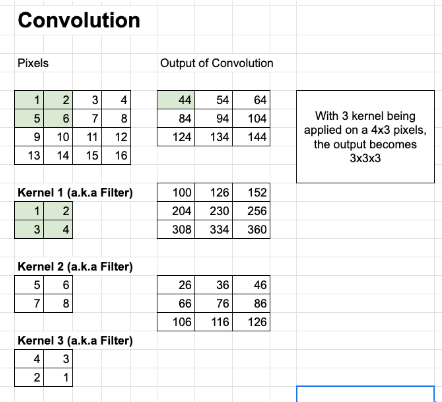

## 2.1 Convolution Operation

Convolution is the heart of CNNs.

Instead of connecting every input pixel to every neuron (like in fully connected networks), CNNs use filters (also called kernels) that slide across the image to detect local patterns.

### How it works:

- A filter/kernel is a small matrix (e.g., 3×3, 5×5) with learnable weights.
- The filter slides over the image (controlled by stride).
- At each position, it computes a dot product between filter weights and the local patch of the image.
- The result is a feature map (also called activation map), which highlights where certain features (edges, textures, shapes) are detected.

### Key Parameters:

### Stride:
In the Convolution operation, stride refers to the number of pixels to traverse, both horizontally and vertically, for each “scan”. Up to this point, we have already learnt that the convolution operation works like a scanner. The kernel is used to scan an image in both horizontal and vertical way.

At the beginning, the kernel is positioned to the top left corner and run the SUMPRODUCT. Then, it is moved by 1 pixel, either horizontally or vertically, to scan another groups of pixels. The caveat is that the kernel can choose to move by how many pixels. The parameter to control the movement is called “Stride”.

- Step size of the filter when sliding across the image.

  
- Stride = 1: moves one pixel at a time → more detailed feature map.

  
- Stride = 2 or more: skips pixels → reduces output size.
      
### Padding:
In the Convolution operation, can observe that the bottom right of the kernel can never be multiplied with the top left of the image pixel.

![](https://raylai.co/wp-content/uploads/2025/01/Screenshot-2025-01-10-at-2.59.20%E2%80%AFPM.png)

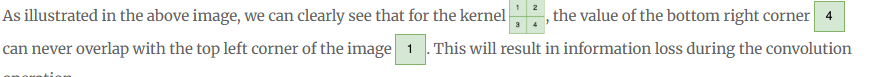

To resolve this issue, we can pad the image with a 1 pixel boarder. As illustrated in the above picture, with grey padding, the bottom right of the kernel can be applied to the top left pixel of the image. Hence, this can reduce information loss.

- Sometimes filters shrink the image size after convolution.
  
- Padding adds extra pixels (usually zeros) around the image to preserve size.

  
- Same Padding: output size ≈ input size.

  
- Valid Padding: no padding, output shrinks.

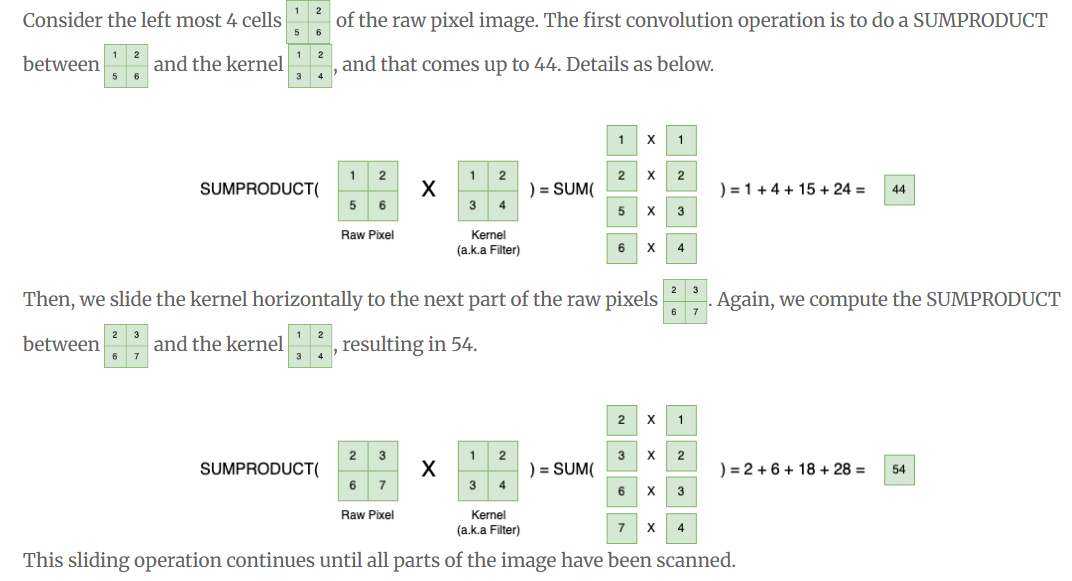

### Why it matters:

- Convolutions allow the network to focus on local patterns (edges, corners, textures).
  
- Multiple filters can detect different features in the same image.

👉 Think of convolution as the network’s "pattern detector".

---

## Convolution on RGB images

One details that I found not easy to understand is the convolution of a colour images with RGB channels. It looks intuitive in all the texts but the details are mostly skipped.

Essentially, to run the convolution operation on a 3-channel image, you are running a SUMPRODUCT operation on each channel, and SUM all the outputs together.

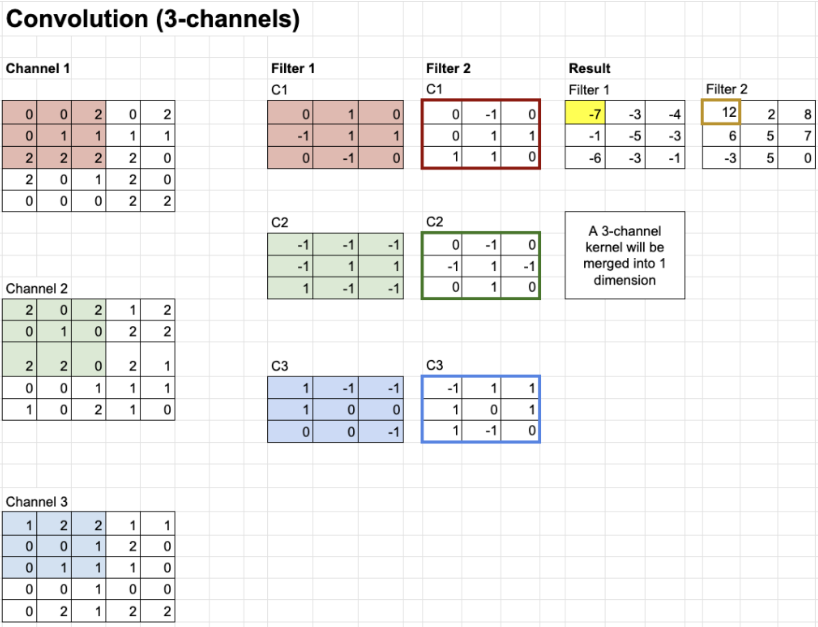

Let’s do it step by step. Because the image has 3 channels, our filter will also have 3 channels, where we can map each channel of the filter to the channel of the image. The first step of the convolution operation will be as follow:

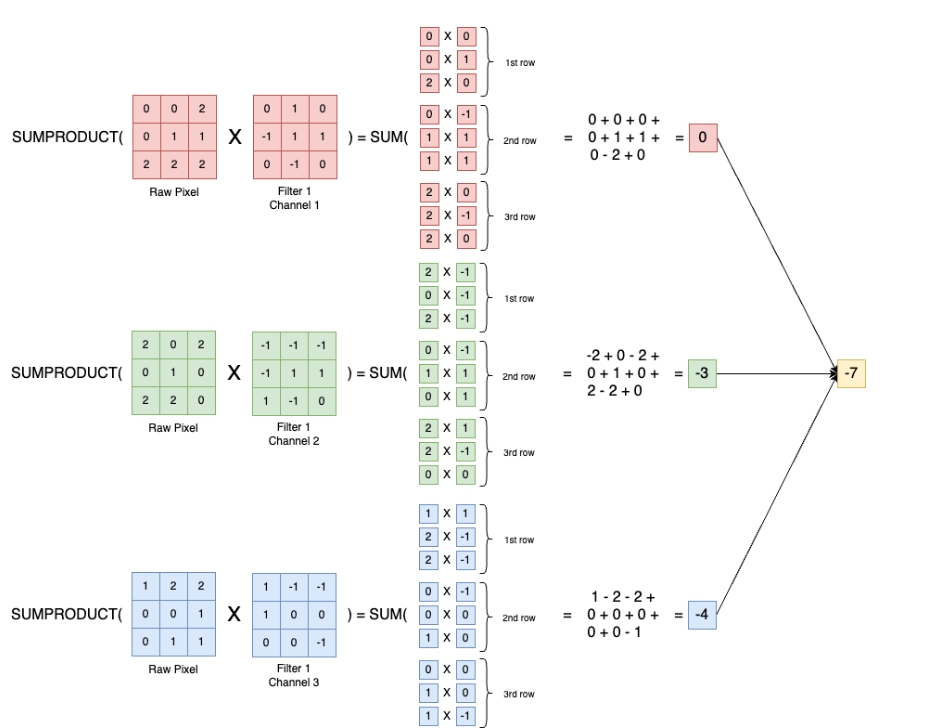

The steps are:

1. Apply the each channel of the filter on the channel of the image respectively. This gives us the by-channel outcome, which is 0, -3, and -4 respectively. (As depicted in the above image)
2. Sum the outcome of each of the channel, then that would be the 1st outcome of the Convolution operation

It is important to note that although the original input has 3 channels, and the filter also has 3 channel, the outcome value is a scalar (1-dimension). This is important because that means the new dimensions after the convolution step is the Outcome width x Outcome height x Number of filters. We will see why this is important in later stage.

This operation will be repeated for each filter. If we have 10 filters, then we will have 10 sets of convolution outcomes. The will be stacked together, which means the outcome of the convolution operation will have 10 channels.

---



# 2. Pooling Operation(max, avg)



Pooling layer is used in CNNs to reduce the spatial dimensions (width and height) of the input feature maps while retaining the most important information. It involves sliding a two-dimensional filter over each channel of a feature map and summarizing the features within the region covered by the filter. Pooling reduces the size of feature maps, making the network faster and less prone to overfitting.

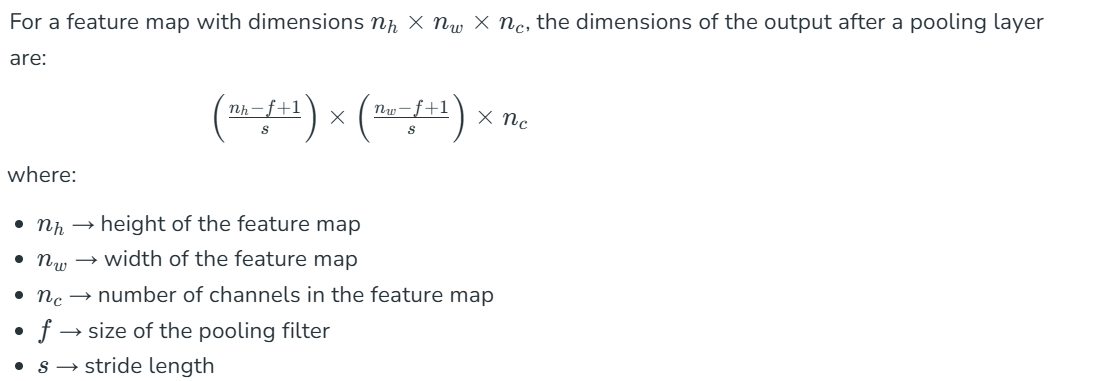

It keeps the most **important information** while discarding unnecessary details.

## Why are Pooling Layers Important?

1. Dimensionality Reduction: Pooling layers reduce the spatial size of the feature maps, which decreases the number of parameters and computations in the network. This makes the model faster and more efficient.
2. Translation Invariance: Pooling helps the network become invariant to small translations or distortions in the input image. For example, even if an object in an image is slightly shifted, the pooled output will remain relatively unchanged.
3. Overfitting Prevention: By reducing the spatial dimensions, pooling layers help prevent overfitting by providing a form of regularization.
4. Feature Hierarchy: Pooling layers help build a hierarchical representation of features, where lower layers capture fine details and higher layers capture more abstract and global features.

## **Types of Pooling:**

### 1. **Max Pooling**:

- Takes the **maximum value** in each region (e.g., 2×2 block).
  
- Keeps the strongest feature response.

  
- Example: If a filter detects an edge, max pooling ensures it’s captured even if the edge shifts slightly.

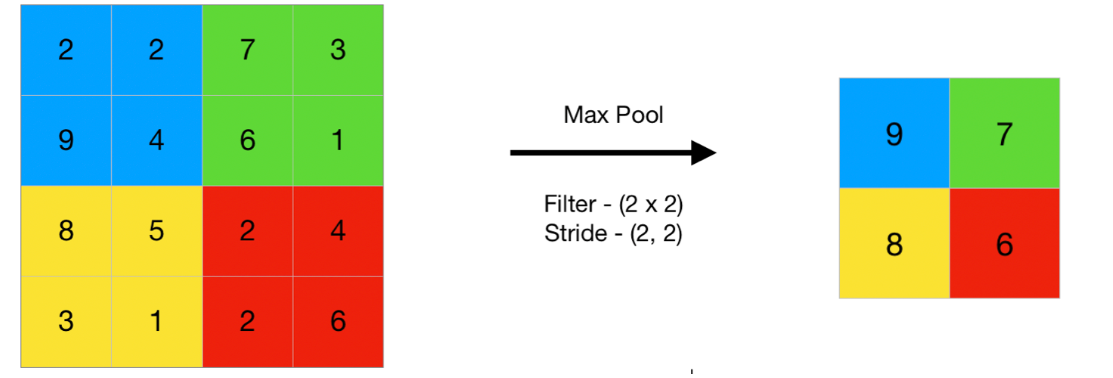



In [2]:
from tensorflow.keras.layers import MaxPooling2D
import numpy as np

# Example input feature map
feature_map = np.array([
    [1, 3, 2, 9],
    [5, 6, 1, 7],
    [4, 2, 8, 6],
    [3, 5, 7, 2]
]).reshape(1, 4, 4, 1)

# Applying max pooling
max_pool = MaxPooling2D(pool_size=(2, 2), strides=2)
output = max_pool(feature_map)

print(output.numpy().reshape(2, 2))

[[6 9]
 [5 8]]


### 2. **Average Pooling:**

- Takes the average value of the region.
  
- Smoother but less common in modern CNNs.

  
- Average pooling provides a more generalized representation of the input. It is useful in the cases where preserving the overall context is important.

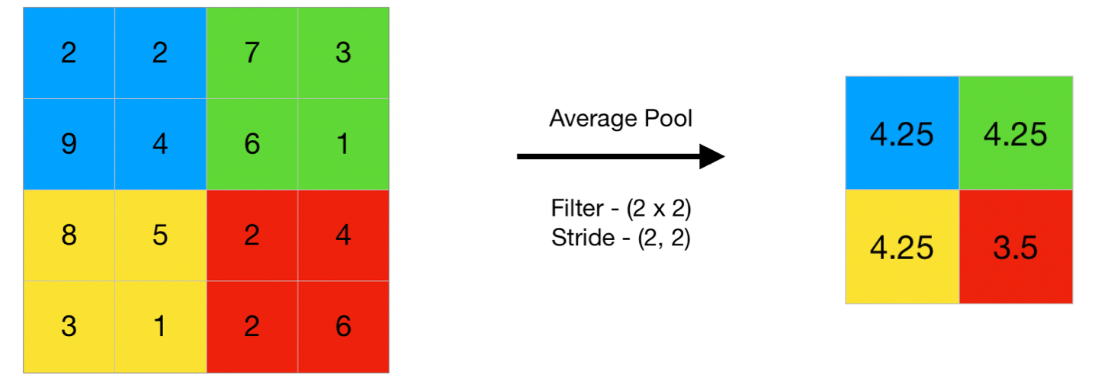

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D

feature_map = np.array([
    [1, 3, 2, 9],
    [5, 6, 1, 7],
    [4, 2, 8, 6],
    [3, 5, 7, 2]
], dtype=np.float32).reshape(1, 4, 4, 1)  # Convert to float32

# Applying average pooling
avg_pool = AveragePooling2D(pool_size=(2, 2), strides=2)
output = avg_pool(feature_map)
print(output.numpy().reshape(2, 2))

[[3.75 4.75]
 [3.5  5.75]]


### 3. **Global Pooling:**

Global pooling reduces each channel in the feature map to a single value, producing a 1×1×nc output. This is equivalent to applying a filter of size nh×nw

There are two types of global pooling:

- Global Max Pooling: Takes the maximum value across the entire feature map.
  
- Global Average Pooling: Computes the average of all values in the feature map.

In [4]:
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D

feature_map = np.array([
    [1, 3, 2, 9],
    [5, 6, 1, 7],
    [4, 2, 8, 6],
    [3, 5, 7, 2]
], dtype=np.float32).reshape(1, 4, 4, 1) 

# Applying global max pooling
gm_pool = GlobalMaxPooling2D()
gm_output = gm_pool(feature_map)

# Applying global average pooling
ga_pool = GlobalAveragePooling2D()
ga_output = ga_pool(feature_map)

print("Global Max Pooling Output:", gm_output.numpy())
print("Global Average Pooling Output:", ga_output.numpy())

Global Max Pooling Output: [[9.]]
Global Average Pooling Output: [[4.4375]]


## How Pooling Layers Work?

1. Define a Pooling Window (Filter): The size of the pooling window (e.g., 2x2) is chosen, along with a stride (the step size by which the window moves). A common choice is a 2x2 window with a stride of 2, which reduces the feature map size by half.
   
2. Slide the Window Over the Input: The pooling operation is applied to each region of the input feature map covered by the window.

   
3. Apply the Pooling Operation: Depending on the type of pooling (max, average, etc.), the operation extracts the required value from each window.

   
4. Output the Downsampled Feature Map: The result is a smaller feature map that retains the most important information.

## Key Factors to Consider for Optimizing Pooling Layer

- Pooling Window Size: The size of the pooling window affects the degree of downsampling. A larger window results in more aggressive downsampling but may lose important details.
  
- Stride: The stride determines how much the pooling window moves at each step. A larger stride results in greater dimensionality reduction.

  
- Padding: In some cases, padding is used to ensure that the pooling operation covers the entire input feature map.

## Advantages of Pooling Layer

1. Dimensionality reduction: Pooling layer helps in reducing the spatial dimensions of the feature maps. This reduces the computational cost and also helps in avoiding overfitting by reducing the number of parameters in the model.
   
2. Translation invariance: Pooling layers are useful in achieving translation invariance in the feature maps. This means that the position of an object in the image does not affect the classification result, as the same features are detected regardless of the position of the object.

   
3. Feature selection: Pooling layers help in selecting the most important features from the input, as max pooling selects the most salient features and average pooling provides a balanced representation.

## Disadvantages of Pooling Layers

1. Information Loss: Pooling reduces spatial resolution, which can lead to a loss of important fine details.
   
2. Over-smoothing: Excessive pooling may blur out crucial features.

   
3. Hyperparameter Tuning: The choice of pooling size and stride affects performance and requires careful tuning.

---

# 3. Activation functions ⚡🧠 (ReLU, Leaky ReLU, GELU)

Activation function decides whether a neuron should be activated by calculating the weighted sum of inputs and adding a bias term. This helps the model make complex decisions and predictions by introducing non-linearities to the output of each neuron.

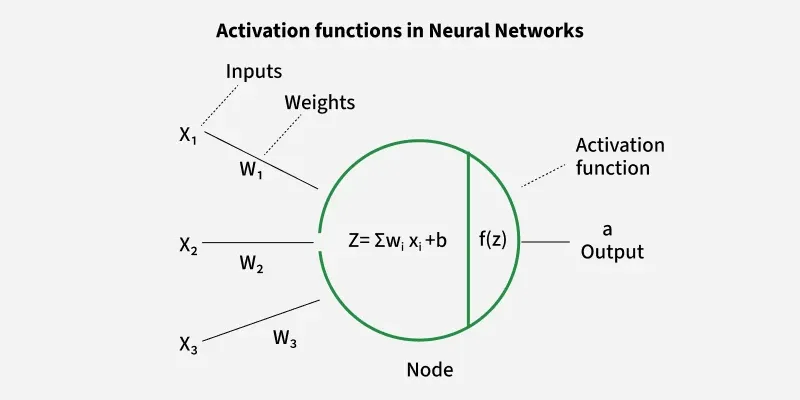

## Types of Activation Functions in Deep Learning

### **1. Linear Activation Function**

Linear Activation Function resembles straight line define by y=x. No matter how many layers the neural network contains if they all use linear activation functions the output is a linear combination of the input.

- The range of the output spans from (−∞ to +∞).
    
    
- Linear activation function is used at just one place i.e. output layer.

- Using linear activation across all layers makes the network's ability to learn complex patterns limited.

Linear activation functions are useful for specific tasks but must be combined with non-linear functions to enhance the neural network’s learning and predictive capabilities.

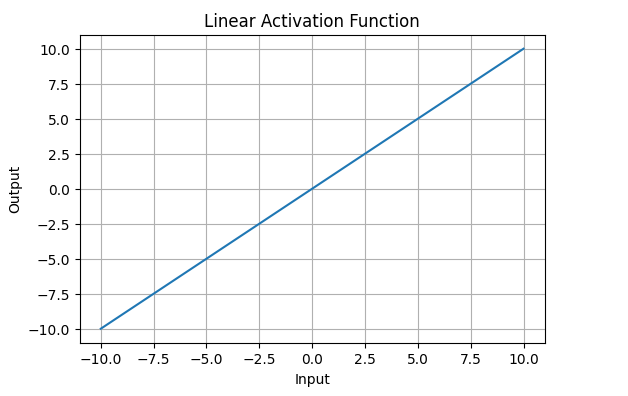

--- 

### 2. Non-Linear Activation Functions

**1. Sigmoid Function**

Sigmoid Activation Function is characterized by 'S' shape.

It is mathematically defined as.

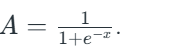

This formula ensures a smooth and continuous output that is essential for gradient-based optimization methods.

- It allows neural networks to handle and model complex patterns that linear equations cannot.
  
- The output ranges between 0 and 1, hence useful for binary classification.
  
- The function exhibits a steep gradient when x values are between -2 and 2. This sensitivity means that small changes in input x can cause significant changes in output y which is critical during the training process.

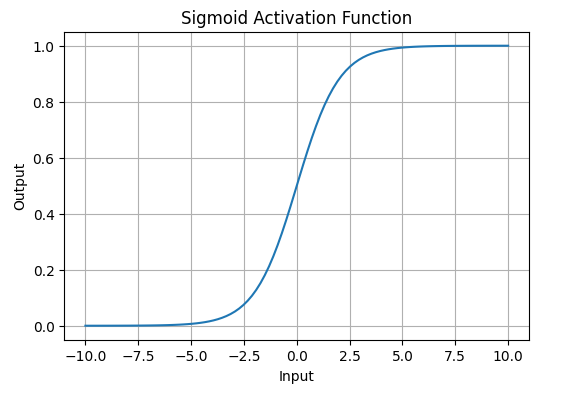


### **3. ReLU** (Rectified Linear Unit) **Function** ⚡

ReLU activation is defined by A(x)=max⁡(0,x) this means that if the input x is positive, ReLU returns x, if the input is negative, it returns 0.

- Value Range: [0,∞), meaning the function only outputs non-negative values.
    
    [0,∞)
    
- Nature: It is a non-linear activation function, allowing neural networks to learn complex patterns and making backpropagation more efficient.

  
- Advantage over other Activation: ReLU is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations. At a time only a few neurons are activated making the network sparse making it efficient and easy for computation.

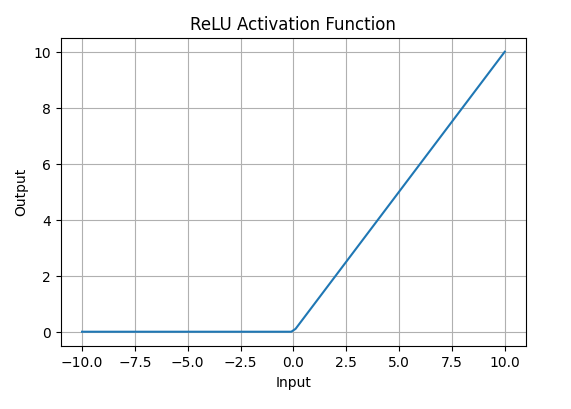

---

## 3. **Exponential Linear Units** 🧮

### 1. Softmax Function 

Softmax Function is designed to handle multi-class classification problems. It transforms raw output scores from a neural network into probabilities. It works by squashing the output values of each class into the range of 0 to 1 while ensuring that the sum of all probabilities equals 1.

- Softmax is a non-linear activation function.
  
- The Softmax function ensures that each class is assigned a probability, helping to identify which class the input belongs to.

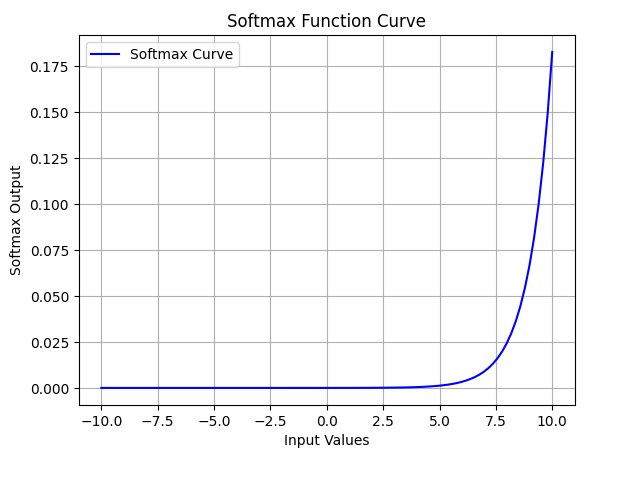

### **2. SoftPlus Function**

Softplus function is defined mathematically as:

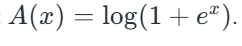

This equation ensures that the output is always positive and differentiable at all points which is an advantage over the traditional ReLU function.

- Nature: The Softplus function is non-linear.
  
- Range: The function outputs values in the range (0,∞), similar to ReLU, but without the hard zero threshold that ReLU has. 
    
- Smoothness: Softplus is a smooth, continuous function, meaning it avoids the sharp discontinuities of ReLU which can sometimes lead to problems during optimization.

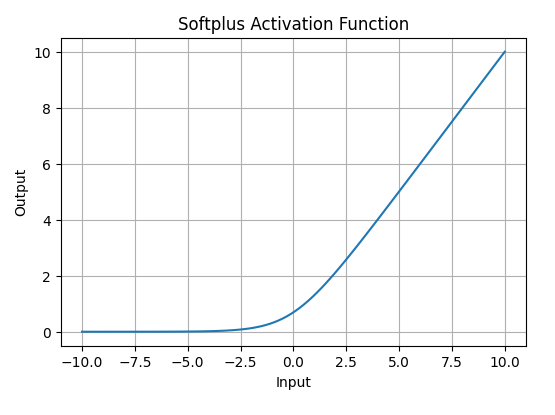

## Impact of Activation Functions on Model Performance ⚙️

The choice of activation function has a direct impact on the performance of a neural network in several ways:

1. **Convergence Speed:** Functions like ReLU allow faster training by avoiding the vanishing gradient problem while Sigmoid and Tanh can slow down convergence in deep networks.
   
2. **Gradient Flow:** Activation functions like ReLU ensure better gradient flow, helping deeper layers learn effectively. In contrast Sigmoid can lead to small gradients, hindering learning in deep layers.

   
3. **Model Complexity:** Activation functions like Softmax allow the model to handle complex multi-class problems, whereas simpler functions like ReLU or Leaky ReLU are used for basic layers.

---

## Common Activation Functions:

### 1. ReLU (Rectified Linear Unit): ⚡

ReLU is efficient and avoids vanishing/exploding gradient issues but suffers from the dying ReLU problem, where negative inputs lead to inactive neurons.
ReLU helps mitigate the vanishing gradient problem because the gradient is either 0 (for negative inputs) or 1 (for positive inputs). This ensures that during backpropagation, the gradients do not diminish exponentially as they would with sigmoid or tanh functions.
- Formula: f(x) = max(0, x)
  
- Sets all negative values to 0, keeps positive values.

  
- Fast, simple, and avoids the "vanishing gradient" problem.

  
- Most widely used in CNNs.

  
The Dying ReLU Problem:

- Cause: The dying ReLU problem occurs when neurons only receive negative input. When this happens, the output of the ReLU function is zero. As a result, during the backpropagation process, there is no gradient flowing through the neuron, and its weights do not get updated.


- Impact: Once a ReLU neuron gets stuck in this state where it only outputs zero, it is unlikely to recover. This is because the gradient through a neuron is zero when its output is zero. Consequently, the neuron becomes inactive, essentially ‘dying’, and ceases to play any role in discriminating the input.

  
- Resulting Issues: If many neurons in a network ‘die’, it can lead to a substantial loss of capacity in the network, and the network may fail to fit or generalize the data properly. This is especially problematic in deeper networks with many layers.

  
### 2. Leaky ReLU: 🌊

To mitigate the dying ReLU problem, Leaky ReLU introduces a small gradient for negative inputs, preserving some activity in the neurons.
However, it struggles with consistency for negative inputs, using a fixed slope throughout training.

When implementing Leaky ReLU, it’s important to experiment with adjusting the learning rate, along with regular evaluations. This can help in determining the optimal configuration for Leaky ReLU in a given neural network.

In summary, Leaky ReLU is a valuable tool in the neural network toolkit, especially for addressing the limitations of the ReLU function.

Its ability to maintain a gradient flow through negative inputs makes it a popular choice for deep neural network models, though careful consideration is needed regarding the choice and handling of the parameters.

- Formula: f(x) = x if x > 0 else αx (where α is a small value like 0.01).
  
- Unlike ReLU, it keeps small negative values.

  
- Fixes the "dying ReLU problem" (when too many neurons output 0 and stop learning).

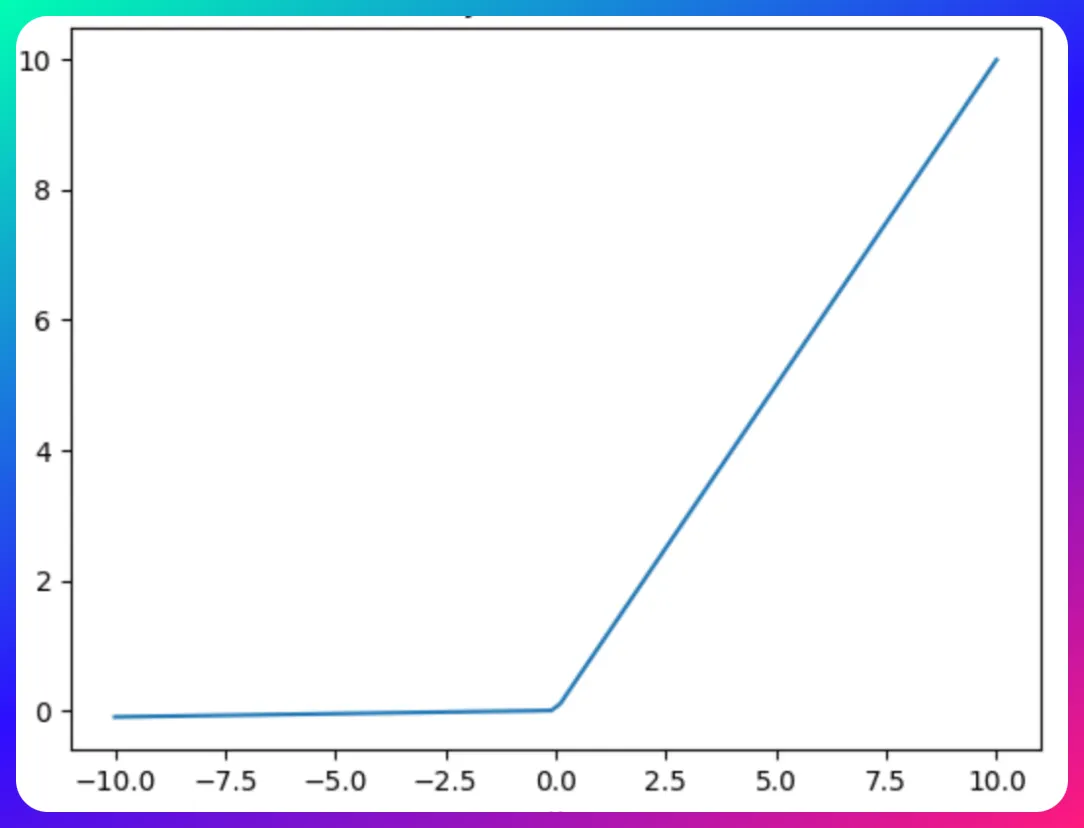
  
### 3. GELU (Gaussian Error Linear Unit):

The Gaussian Error Linear Unit (GeLU) is a relatively recent addition to the suite of activation functions used in neural networks, known for its unique approach to handling inputs. It stands out due to its probabilistic foundations and smooth approximation characteristics.

GeLU is a smooth approximation of the rectifier function, scaling inputs by their percentile rather than their sign, offering another alternative in the ReLU family.

- Smooth version of ReLU.
  
- Instead of hard zero cut-off, it applies a probability-based activation.

  
- Often used in modern architectures (like Transformers).

Due to its smooth and non-linear nature, GeLU can be a good fit for complex models that require more nuanced activation behaviors, such as in advanced computer vision and speech recognition systems.

In summary, the Gaussian Error Linear Unit (GeLU) represents an innovative approach in the realm of activation functions, combining elements of probabilistic modeling with the benefits of smooth, non-linear activation. Its adoption in advanced models highlights its potential, although its computational demands and behavior under various scenarios remain areas for consideration and research.

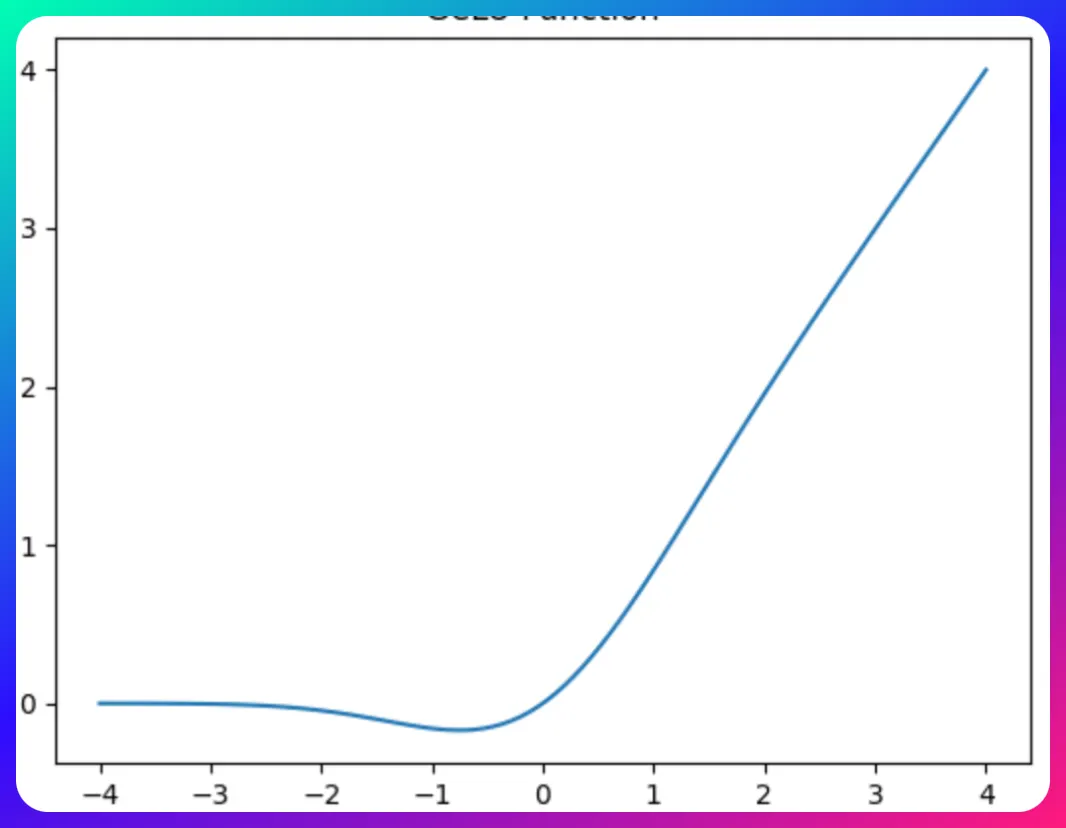

---

### Why Activations Matter: 🔑

- Without them, CNNs would just be linear models.
  
- Activations introduce non-linearity, letting CNNs learn complex visual patterns (curves, textures, abstract shapes).

👉 Think of activations as "feature decision-makers" that decide what signal passes forward.

---

# 4. Fully Connected (Dense) Layers 🧠



Fully Connected (FC) layers are also known as dense layers which are used in neural networks especially in of deep learning. They are a type of neural network layer where every neuron in the layer is connected to every neuron in the previous and subsequent layers. The "fully connected" descriptor comes from the fact that each of the neurons in these layers is connected to every activation in the previous layer creating a highly interconnected network.

- In CNNs fully connected layers often follow convolutional and pooling layers used to interpret the feature maps generated by these layers into the final output categories or predictions.
- In fully connected feedforward networks these layers are the main building blocks that directly process the input data into outputs.

## Structure of Fully Connected Layers 🏗️

The structure of FC layers is one of the most significant factors that define how it works in a neural network. This structure involves the fact that every neuron in one layer will interconnect with every neuron in the subsequent layer.

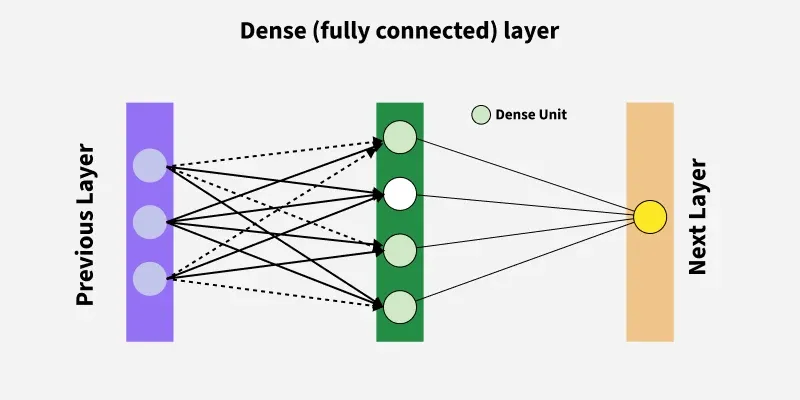

## How it works: 🖼️➡️🧠

- Feature maps are flattened into a 1D vector.
  
- Each neuron in the dense layer connects to all neurons from the previous layer.

  
- The dense layer combines extracted features to perform classification or regression.

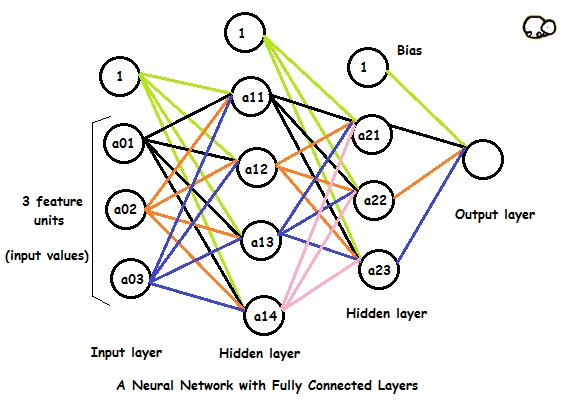

## Role in CNNs: 

- Acts as the final reasoning stage.
  
- Earlier layers: detect edges → textures → object parts.

  
- Dense layer: puts all features together to decide on the final label.

## Output Layer:

- Often uses Softmax (for multi-class classification).
  
- Softmax converts final scores into probabilities.

👉 Think of fully connected layers as the "decision-making brain" of CNNs.

## Advantages of Fully Connected Layers: ✅

- Integration of Features: They are capable of combining all features before making predictions, essential for complex pattern recognition.

- Flexibility: FC layers can be incorporated into various network architectures and handle any form of input data provided it is suitably reshaped.

  
- Simplicity: These layers are straightforward to implement and are supported by all major deep learning frameworks.

  
## Limitations of Fully Connected Layers: ⚠️

Despite their benefits FC layers have several drawbacks:

- High Computational Cost: The dense connections can lead to a large number of parameters, increasing both computational complexity and memory usage.
  
- Prone to Overfitting: Due to the high number of parameters they can easily overfit on smaller datasets unless techniques like dropout or regularization are used.

  
- Inefficiency with Spatial Data: Unlike convolutional layers, FC layers do not exploit the spatial hierarchy of images or other structured data, which can lead to less effective learning.

---
---

# Practice:

## 1. Build a CNN from scratch (NumPy) to classify MNIST digits.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


- numpy → used for all math operations, arrays, and matrix multiplications.

- matplotlib.pyplot → for visualizing images if needed.

- mnist dataset → 28x28 grayscale images of handwritten digits 0-9.

- to_categorical → converts labels (0-9) into one-hot vectors, e.g., 3 → [0,0,0,1,0,0,0,0,0,0].

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


- Loads the MNIST training and testing data.

- x_train.shape = (60000, 28, 28)

- y_train.shape = (60000,)

In [15]:
x_train, x_test = x_train/255.0, x_test/255.0


- Pixel values are 0-255, divide by 255 → scales to [0,1] for numerical stability.

In [16]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


- CNNs expect a channel dimension. MNIST is grayscale → 1 channel.

- Resulting shape: (60000, 28, 28, 1).

In [17]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


- One-hot encoding: converts integer labels to vectors of size 10 (for 10 classes).

In [19]:
def relu(x):
    return np.maximum(0, x)


- ReLU = Rectified Linear Unit.

- Replaces negative values with 0, keeps positive values.

- Adds non-linearity to CNN.

In [20]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)


- Converts raw output scores (logits) into probabilities.

- x - np.max(x) → avoids overflow.

- Output sums to 1 → probability distribution over 10 classes.

In [21]:
def conv2d(input, kernel, stride=1, padding=0):
    input_padded = np.pad(input, [(padding,padding),(padding,padding)], mode='constant')
    kernel_h, kernel_w = kernel.shape
    h_out = (input_padded.shape[0] - kernel_h)//stride + 1
    w_out = (input_padded.shape[1] - kernel_w)//stride + 1
    output = np.zeros((h_out, w_out))
    for i in range(0, h_out*stride, stride):
        for j in range(0, w_out*stride, stride):
            output[i//stride,j//stride] = np.sum(input_padded[i:i+kernel_h, j:j+kernel_w]*kernel)
    return output


- Single-channel convolution: slides a small kernel over the image, multiplies element-wise, sums.

- stride → how many pixels to move each step.

- padding → zero-padding to keep spatial dimensions.

- Produces a feature map highlighting patterns like edges or textures.

In [22]:
def max_pool2d(input, pool_size=2, stride=2):
    h_out = (input.shape[0]-pool_size)//stride + 1
    w_out = (input.shape[1]-pool_size)//stride + 1
    output = np.zeros((h_out, w_out))
    for i in range(0, h_out*stride, stride):
        for j in range(0, w_out*stride, stride):
            output[i//stride,j//stride] = np.max(input[i:i+pool_size, j:j+pool_size])
    return output


- Reduces spatial dimensions (downsampling).

- Keeps maximum value in each pooling window → retains strongest features.

- For MNIST 28x28 → 2x2 pooling → output is 13x13.

In [26]:
class SimpleCNN:
    def __init__(self):
        self.conv1_kernel = np.random.randn(3,3) * 0.1
        self.fc_weights = np.random.randn(13*13,10) * 0.1
        self.fc_bias = np.zeros(10)

    def forward(self, x):
        x = relu(conv2d(x[:,:,0], self.conv1_kernel))  # convolution + ReLU
        x = max_pool2d(x)                             # max pooling
        x = x.flatten()                               # flatten
        x = np.dot(x, self.fc_weights) + self.fc_bias # fully connected layer
        return softmax(x)

- conv1_kernel: 3x3 filter for convolution. Random small numbers for initial weights.

- fc_weights: fully connected layer from flattened 13x13 feature map → 10 output classes.

- fc_bias: bias term for fully connected layer.

Step-by-step:

- x[:,:,0] → extract single channel from the image.

- Convolution → ReLU → feature map.

- Max pooling → downsampled feature map (13x13).

- Flatten → vector of size 169 (13*13).

- Fully connected layer → logits of size 10.

- Softmax → predicted probabilities for digits 0-9.

In [28]:
cnn = SimpleCNN()
sample_image = x_train[0]
output = cnn.forward(sample_image)
print("Predicted probabilities:", output)
print("Predicted class:", np.argmax(output))


Predicted probabilities: [0.09686311 0.10255004 0.10162311 0.09696244 0.10280686 0.09757933
 0.09944985 0.09617648 0.10455419 0.10143459]
Predicted class: 8


- Creates a CNN instance.

- Takes the first image in training set.

- Performs a forward pass → predicts probabilities.

- np.argmax(output) → predicted digit class.

---

## 2. Then re-implement using PyTorch/TensorFlow.


In [31]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


- tensorflow → main deep learning framework.

- mnist → handwritten digit dataset (28x28 grayscale images).

- Sequential → stack layers one after another.

- Conv2D, MaxPooling2D, Flatten, Dense → building blocks of CNN.

- to_categorical → converts integer labels (0–9) into one-hot vectors.

In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)/255.0
x_test = x_test.reshape(-1,28,28,1)/255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


- Reshape: adds channel dimension (28x28x1) for CNN input.

- Normalize: divide by 255 → pixel values in [0,1] → better training stability.

- One-hot encoding: converts class labels into vectors of size 10 for classification.

In [33]:
model = Sequential([
    Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])


Layer by layer:

1. Conv2D
    - 8 filters, 3x3 kernel, ReLU activation.
    - Input shape: (28,28,1).
    - Detects local features like edges or corners.
2. MaxPooling2D
    - Pool size: 2x2 → reduces spatial dimensions from 28x28 → 14x14.
    - Keeps strongest activations → reduces computation and overfitting.
3. Flatten
    - Converts 14x14x8 feature maps → 1D vector of size 14*14*8 = 1568.
4. Dense (Fully Connected)
    - 32 neurons with ReLU → learns combinations of features.
5. Dense Output Layer
    - 10 neurons with Softmax → predicts probability of each digit (0–9).

In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


- optimizer='adam' → adjusts learning rate automatically, efficient for training.

- loss='categorical_crossentropy' → suitable for multi-class classification.

- metrics=['accuracy'] → tracks training/test accuracy.

In [35]:
model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.1)


Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8972 - loss: 0.3603 - val_accuracy: 0.9612 - val_loss: 0.1373
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9575 - loss: 0.1447 - val_accuracy: 0.9700 - val_loss: 0.1045
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9703 - loss: 0.1001 - val_accuracy: 0.9782 - val_loss: 0.0829


- Train for 3 epochs, batch size 64.

- validation_split=0.1 → 10% of training data used for validation during training.

- Output shows training loss & accuracy and validation loss & accuracy each epoch.

In [36]:
loss, acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9729 - loss: 0.0854
Test Accuracy: 0.9728999733924866


- Measures loss and accuracy on unseen test data.

- Gives final generalization performance.

In [38]:
sample_image = x_test[0].reshape(1,28,28,1)
pred = model.predict(sample_image)
predicted_class = pred.argmax()
true_class = y_test[0].argmax()

print("Predicted class:", predicted_class)
print("True class:", true_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted class: 7
True class: 7


- reshape(1,28,28,1) → adds batch dimension (needed by Keras).

- predict() → outputs probabilities for 10 classes.

- argmax() → predicted class with highest probability.

- Compare with true_class → ground truth label.

---
---

# **CNN Architectures**

# Classic Models (understand their contributions):

# Convolutional Neural Networks (CNNs) 

## 1️⃣ Introduction to CNNs

Convolutional Neural Networks (CNNs) are specialized deep learning architectures designed for processing grid-like data (e.g., images, video frames, audio spectrograms). Unlike traditional feedforward neural networks, CNNs exploit the spatial structure of input data.

## 🔹 Biological Inspiration

- CNNs are inspired by the visual cortex in animals. Neurons in the visual cortex respond to specific receptive fields (small regions of the visual field).
- Similarly, CNN filters look at local regions of an image to detect patterns such as edges, curves, textures, and progressively complex shapes.

## 🔹 Core Building Blocks

- Convolutional Layer (Conv2D):
    
    Applies learnable filters (kernels) that slide across the input image. Each filter specializes in detecting certain features (e.g., vertical edges, diagonal edges).
    
- Activation Functions:
    
    Introduce non-linearity into the network.
    
    - ReLU is the most common: efficient, reduces vanishing gradient.
    - Sigmoid/Tanh used in earlier CNNs, but slower and prone to saturation.
- Pooling Layers (Downsampling):
    
    Reduce spatial size while retaining key information.
    
    - MaxPooling → keeps strongest features.
    - AvgPooling → smooths feature maps.
- Flatten Layer:
    
    Converts 2D feature maps into a 1D vector, making them suitable for fully connected layers.
    
- Fully Connected (Dense) Layers:
    
    Integrate high-level features to form class-level decisions.
    
- Softmax Layer:
    
    Converts final scores into a probability distribution for classification tasks.
    

### 🔹 Typical Workflow

Input Image → Convolution → Activation → Pooling → Flatten → Dense → Output

Each stage moves from low-level features (edges) → mid-level (textures, shapes) → high-level (objects, categories).

---

## 2️⃣ Classic CNN Architectures & Evolution

## 🅰️ LeNet-5 (1998)

LeNet-5 is a convolutional neural network (CNN) architecture that introduced several key features and innovations that have become standard in modern deep learning. It demonstrated the effectiveness of CNNs for image recognition tasks and introduced key concepts such as convolution, pooling, and hierarchical feature extraction that underpin modern deep learning models.

- Purpose:
    - Handwritten digit recognition (MNIST dataset).
    - Object and face recognition in images and videos.
    - Autonomous driving systems for recognizing and interpreting road signs.

- Architecture:
    
    Input (32×32 grayscale) → Conv → AvgPooling → Conv → AvgPooling → FC → FC → Output.

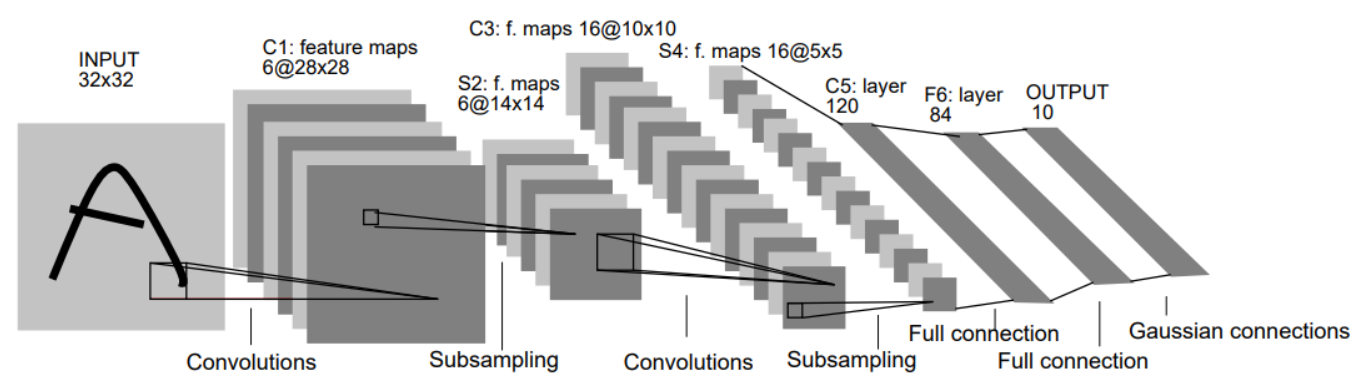

- Key Innovations:
    - Introduced convolution + pooling as learnable feature extractors.
      
    - End-to-end trainable system (no hand-crafted features).
 
--- 

## **Layer-by-Layer Breakdown**

### 1. Input

- 32×32 grayscale image (padded around centered ~20×20 digit)

- Pixel values normalized (background = 0, foreground = 1) to center data and speed up learning

### 2. Layer C1 (Convolutional Layer)

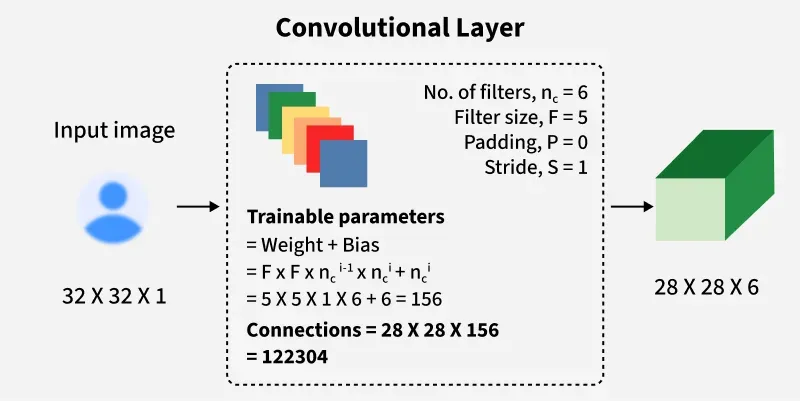

- Feature Maps: 6 feature maps.

- Connections: Each unit is connected to a 5x5 neighborhood in the input, producing 28x28 feature maps to prevent boundary effects.

- Parameters: 156 trainable parameters and 117,600 connections.

### 3. Layer S2 (Subsampling Layer)

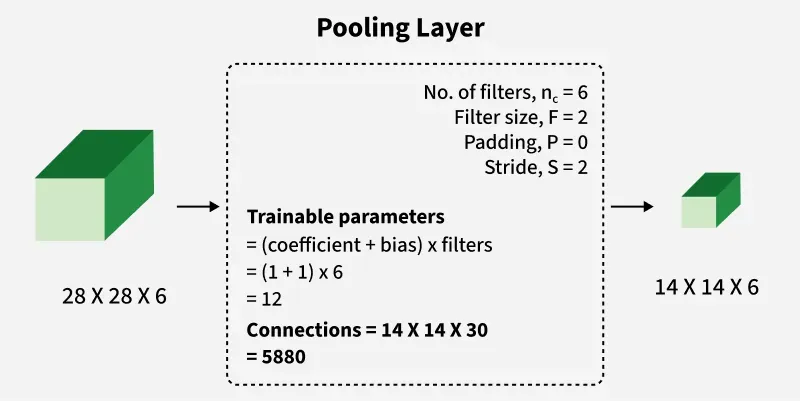

- Feature Maps: 6 feature maps.

- Size: 14x14 (each unit connected to a 2x2 neighborhood in C1).

- Operation: Each unit adds four inputs, multiplies by a trainable coefficient, adds a bias, and applies a sigmoid function.

- Parameters: 12 trainable parameters and 5,880 connections.

(Partial Connectivity: C3 is not fully connected to S2, which limits the number of connections and breaks symmetry, forcing feature maps to learn different, complementary features.)


### 4. Layer C3 (Convolutional Layer)

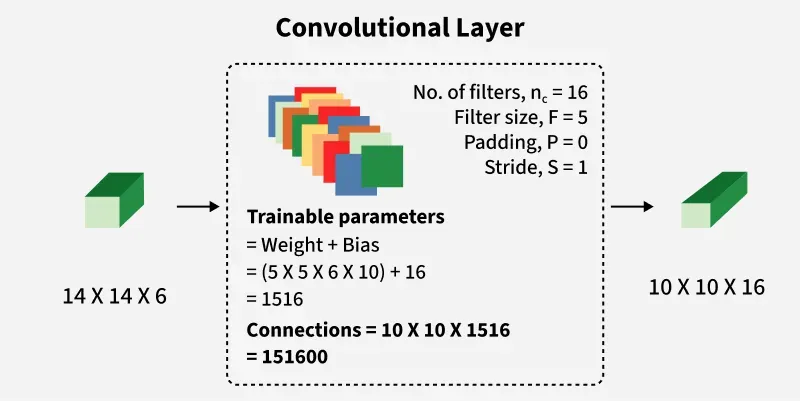

- Feature Maps: 16 feature maps.

- Connections: Each unit is connected to several 5x5 neighborhoods at identical locations in a subset of S2’s feature maps.

- Parameters and Connections: Connections are partially connected to force feature maps to learn different features, with 1,516 trainable parameters and 151,600 connections.

### 5. Layer S4 (Subsampling Layer)

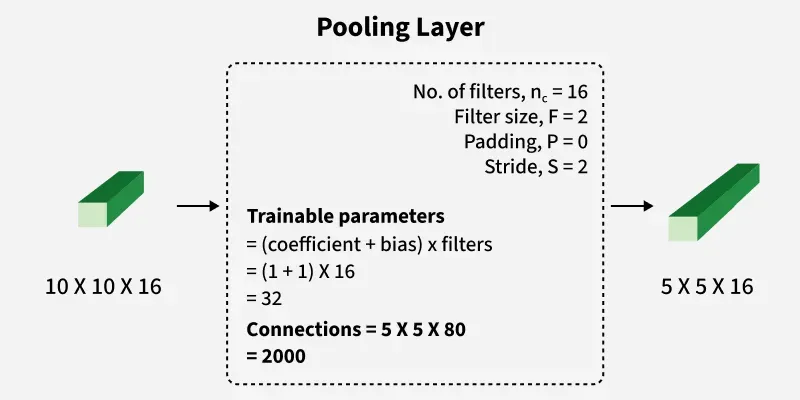

- Feature Maps: 16 feature maps.

- Size: 7x7 (each unit connected to a 2x2 neighborhood in C3).

- Parameters: 32 trainable parameters and 2,744 connections.

### 6. Layer C5 (Convolutional Layer)

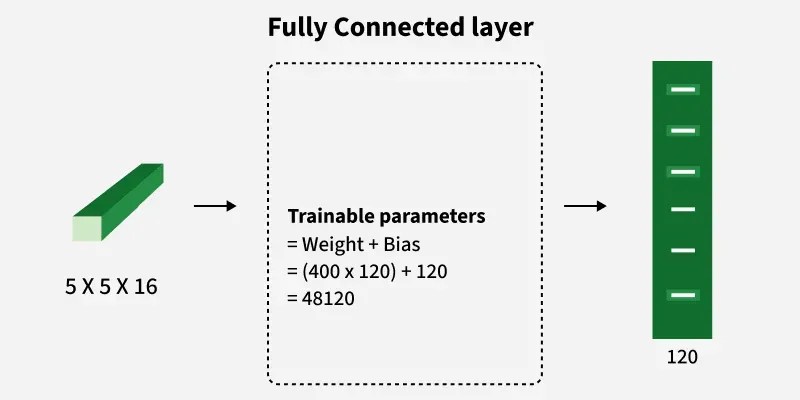

- Feature Maps: 120 feature maps.

- Size: 1x1 (each unit connected to a 5x5 neighborhood on all 16 of S4’s feature maps, effectively fully connected due to input size).

- Parameters: 48,000 trainable parameters and 48,000 connections.

### 7. Layer F6 (Fully Connected Layer)

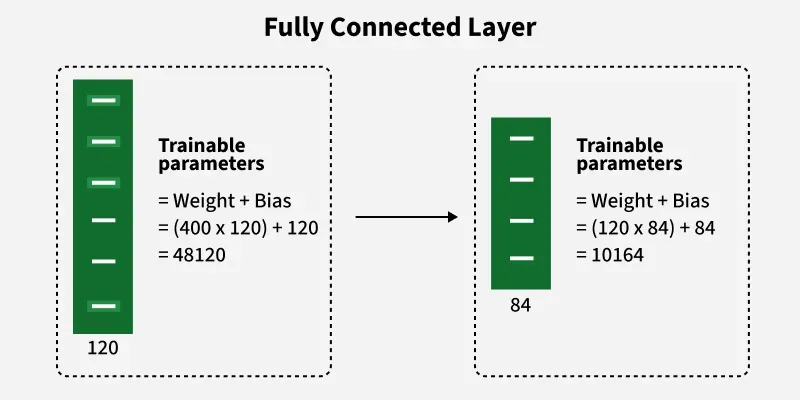

- Units: 84 units.

- Connections: Each unit is fully connected to C5, resulting in 10,164 trainable parameters.

- Activation: Uses a scaled hyperbolic tangent function f(a) = Atan(Sa) where A = 1.7159 and S = 2/3.

### 8. Output Layer

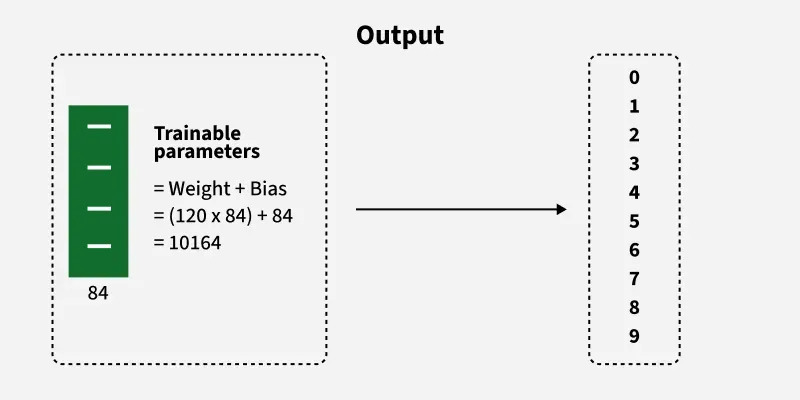

## Detailed Explanation of the Layers
- Convolutional Layers (Cx): These layers apply convolution operations to the input, using multiple filters to extract different features. The filters slide over the input image, computing the dot product between the filter weights and the input pixels. This process captures spatial hierarchies of features, such as edges and textures.

- Subsampling Layers (Sx): These layers perform pooling operations (average pooling in the case of LeNet-5) to reduce the spatial dimensions of the feature maps. This helps to control overfitting, reduce the computational load, and make the representation more compact.

  
- Fully Connected Layers (Fx): These layers are densely connected, meaning each neuron in these layers is connected to every neuron in the previous layer. This allows the network to combine features learned in previous layers to make final predictions.

### 💡 Why LeNet-5 Matters

- Set a template: convolution → pooling → deeper convolution → pooling → fully connected → output

- Introduced weight sharing, local receptive fields, feature hierarchy, and data-driven learning

- Demonstrated CNNs could automatically extract spatial features—no handcrafted filters needed 

- Even this small network achieved <1% error on handwritten digit datasets and was deployed at scale (e.g. postal applications) 

- A benchmark that paved the way for larger CNNs like AlexNet, VGG, etc.
     
### Advantages:
- Lightweight, works well for simple tasks.
      
- Proved CNNs could outperform traditional ML methods.
 
      
### Disadvantages:
- Very shallow (7 layers).
  
- Relied on Sigmoid/Tanh → slow + vanishing gradients.

  
- Not scalable to complex datasets (e.g., natural images).
 
      
- Key Insight: CNNs can automatically learn hierarchical features → breakthrough idea at the time.

---


      



In [44]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [45]:
rows, cols = 28, 28

# Reshape the data into a 4D Array
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

input_shape = (rows,cols,1) 

# Set type as float32 and normalize the values to [0,1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# Transform labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)

## 📌 Data Preparation

- Import libraries (matplotlib, tensorflow, numpy).

- Load MNIST dataset (handwritten digits 0–9).

- Reshape images → 4D (samples, 28, 28, 1).

- Normalize pixel values → range [0,1].

- Convert labels to one-hot encoding (10 classes).



In [42]:
def build_lenet(input_shape):
  # Define Sequential Model
  model = tf.keras.Sequential()

  # C1 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', input_shape=input_shape))

  # S2 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C3 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh'))

  # S4 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C5 Fully Connected Layer
  model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

  # Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
  model.add(tf.keras.layers.Flatten())

  # FC6 Fully Connected Layers
  model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

  # Output Layer
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  return model

## 📌 Model Building (LeNet-5 style)

- Define a Sequential model.

- C1: Conv2D (6 filters, 5×5, tanh).

- S2: AvgPooling (2×2).

- C3: Conv2D (6 filters, 5×5, tanh).

- S4: AvgPooling (2×2).

- C5: Dense(120, tanh) – fully connected.

- Flatten → convert to 1D vector.

- F6: Dense(84, tanh).

- Output Layer: Dense(10, softmax).

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9053 - loss: 0.3258
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9564 - loss: 0.1484
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9689 - loss: 0.1051
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9760 - loss: 0.0823
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9802 - loss: 0.0663
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9832 - loss: 0.0558
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9850 - loss: 0.0498
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9870 - loss: 0.0441
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9883 - loss: 0.0395
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9893 - loss: 0.0351
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9839 - loss: 0.0502
Accuracy :  0.9839000105857849
Training Data (60000

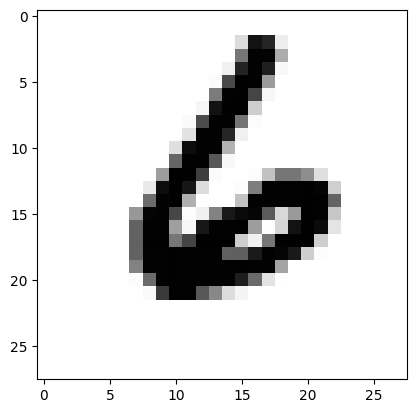

In [43]:
lenet = build_lenet(input_shape)

# Compile the model
lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# We will be allowing 10 itterations to happen
epochs = 10
history = lenet.fit(x_train, y_train, epochs=epochs,batch_size=128, verbose=1)

# Check Accuracy of the Model
# Transform labels to one hot encoding
if len(y_test.shape) != 2 or y_test.shape[1] != 10:
  y_test = tf.keras.utils.to_categorical(y_test, 10)

loss ,acc= lenet.evaluate(x_test, y_test)
print('Accuracy : ', acc)

x_train = x_train.reshape(x_train.shape[0], 28,28)
print('Training Data', x_train.shape, y_train.shape)
x_test = x_test.reshape(x_test.shape[0], 28,28)
print('Test Data', x_test.shape, y_test.shape)

# Plot the Image
image_index = 8888
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')

# Make Prediction
pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1 ))
print(pred.argmax())

## 📌 Training

- Compile with Adam optimizer, categorical crossentropy loss, metric = accuracy.

- Train for 10 epochs, batch size = 128.

## 📌 Evaluation & Testing

- Evaluate on test set → prints accuracy.

- Reshape back data for visualization.

- Display a test image (plt.imshow).

- Predict digit for that image → print predicted class.

---

# 🅱️ AlexNet (2012)

**AlexNet** consists of 8 layers, including 5 convolutional layers and 3 fully connected layers. It uses traditional stacked convolutional layers with max-pooling in between. Its deep network structure allows for the extraction of complex features from images.

- The architecture employs overlapping pooling layers to reduce spatial dimensions while retaining the spatial relationships among neighbouring features.

- **Activation function**: AlexNet uses the ReLU activation function and dropout regularization, which enhance the model's ability to capture non-linear relationships within the data.

### The key features of AlexNet are as follows:-

- AlexNet was created to be more computationally efficient than earlier CNN topologies. It introduced parallel computing by utilising two GPUs during training.
  
- AlexNet is a relatively shallow network compared to GoogleNet. It has eight layers, which makes it simpler to train and less prone to overfitting on smaller datasets.

  
- In 2012, AlexNet produced ground-breaking results in the ImageNet Large Scale Visual Recognition Challenge (ILSVRC). It outperformed prior CNN architectures greatly and set the path for the rebirth of deep learning in computer vision.

  
- Several architectural improvements were introduced by AlexNet, including the use of rectified linear units (ReLU) as activation functions,overlapping pooling, and dropout regularisation. These strategies aided in the improvement of performance and generalisation.

  
- Purpose: Large-scale image classification (ImageNet, 1.2M images, 1000 classes).

  
- Architecture:

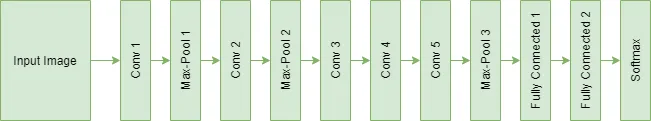

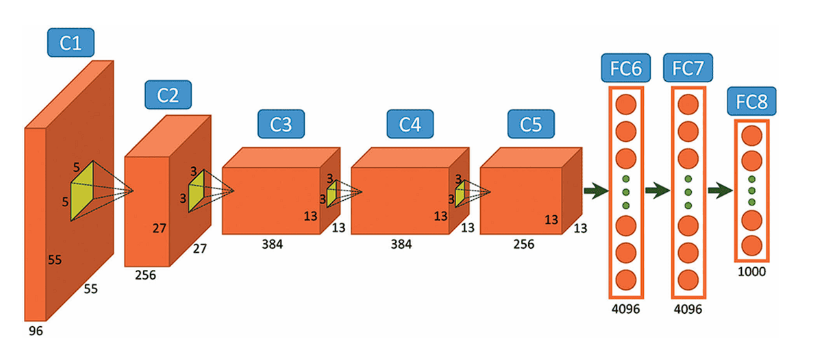

### Input Layer:

- AlexNet takes images of the Input size of 227x227x3 RGB Pixels.

### Convolutional Layers:

- First Layer: The first layer uses 96 kernels of size 11×11 with a stride of 4, activates them with the ReLU activation function, and then performs a Max Pooling operation.

- Second Layer: The second layer takes the output of the first layer as the input, with 256 kernels of size 5x5x48.

- Third Layer: 384 kernels of size 3x3x256. No pooling or normalization operations are performed on the third, fourth, and fifth layers.

- Fourth Layer: 384 kernels of size 3x3x192.

- Fifth Layer: 256 kernels of size 3x3x192.

### Fully Connected Layers:

- The fully connected layers have 4096 neurons each.

### Output Layer:

- The output layer is a SoftMax layer that outputs probabilities of the 1000 class labels.
  
## Innovations:
- ReLU activation → fast training, avoids vanishing gradients.
  
- Dropout → prevents overfitting in fully connected layers.

  
- GPU acceleration → trained in days instead of weeks.

  
- Data augmentation (flips, crops) → generalization.

  
## Advantages:
- Use of ReLU Activation: First major architecture to use ReLU (Rectified Linear Unit) which enabled faster training compared to traditional tanh/sigmoid functions.
  
- Dropout for Regularization: Introduced dropout layers to reduce overfitting by randomly disabling neurons during training.
  
- GPU Utilization: Split the network across two GPUs, showing how deep learning can benefit from parallel computing for faster training.

  
- Overlapping Max-Pooling: Used overlapping pooling layers to improve generalization and reduce top-1 and top-5 classification errors.

  
##  Disadvantages:
- Large Model Size: Has around 60 million parameters making it memory-intensive and slow for inference on low-resource devices.
  
- High Computational Cost: Training is computationally expensive even though it was optimized for GPUs.

  
- Manual Architecture Design: The architecture lacks modularity and automation, unlike modern approaches like NAS or EfficientNet.

  
- Not Optimal for Small Datasets: Tends to overfit on smaller datasets like CIFAR-10 or MNIST without heavy regularization.

  
- Outdated Compared to Modern Architectures: Lacks innovations like residual connections (ResNet), depthwise separable convolutions (MobileNet) and attention mechanisms (ViT).
 
  
- Key Insight: Deep CNNs + GPUs = practical large-scale computer vision.




Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 103ms/step - accuracy: 0.3913 - loss: 1.6663 - val_accuracy: 0.5178 - val_loss: 1.3528
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.5385 - loss: 1.2921 - val_accuracy: 0.5892 - val_loss: 1.1531
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 110ms/step - accuracy: 0.6045 - loss: 1.1149 - val_accuracy: 0.6538 - val_loss: 0.9927
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 122ms/step - accuracy: 0.6539 - loss: 0.9884 - val_accuracy: 0.6802 - val_loss: 0.9228
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.6909 - loss: 0.8860 - val_accuracy: 0.7023 - val_loss: 0.8415
Test Accuracy: 0.7047


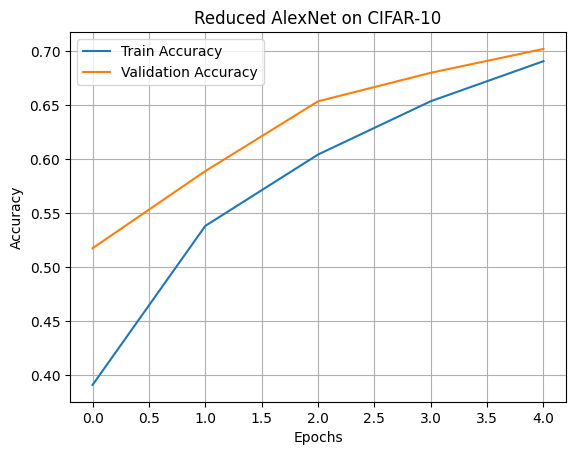

In [6]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Reduced AlexNet for CIFAR-10
model = Sequential([
    # Conv Layer 1
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Conv Layer 2
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Conv Layer 3
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten
    Flatten(),

    # Fully Connected Layers
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (fast version)
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Reduced AlexNet on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### 1. Imports

- cifar10 → loads the CIFAR-10 dataset (60k images, 32×32, 10 classes).
- to_categorical → converts labels (0–9) into one-hot vectors.
- Sequential + layers → used to build the CNN model step by step.
- matplotlib.pyplot → for plotting training vs validation accuracy.


### 2. Data Preprocessing

- cifar10.load_data() → gives train and test sets.
- x_train / 255.0 → normalizes pixel values (0–255 → 0–1). Helps faster convergence.
- to_categorical(y, 10) → converts labels like 3 into [0,0,0,1,0,0,0,0,0,0].


### 3. Model Architecture (Reduced AlexNet)

- Conv Layer 1
    - Conv2D(32, (3,3), padding='same', activation='relu') → extracts 32 feature maps.
    - MaxPooling2D(2,2) → reduces spatial size (downsampling).
- Conv Layer 2
    - Conv2D(64, (3,3), 'same', relu) → deeper features.
    - MaxPooling2D(2,2) → downsample again.
- Conv Layer 3
    - Conv2D(128, (3,3), 'same', relu) → captures complex patterns.
    - MaxPooling2D(2,2) → reduces size further.
- Flatten
    - Converts 3D feature maps → 1D vector for fully connected layers.
- Dense Layer 1 (FC)
    - Dense(256, relu) → learns high-level features.
    - Dropout(0.5) → randomly drops 50% neurons → prevents overfitting.
- Output Layer
    - Dense(10, softmax) → outputs probability distribution over 10 classes.


### 4. Compilation

- optimizer='adam' → efficient gradient descent method.
- loss='categorical_crossentropy' → suitable for multi-class classification.
- metrics=['accuracy'] → tracks accuracy during training/testing.


### 5. Training

- fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)
    - Trains model for 5 epochs.
    - Uses 128 images per batch.
    - 20% of training data is used for validation.


### 6. Evaluation

- model.evaluate(x_test, y_test) → checks accuracy on unseen test set.


### 7. Visualization

- Plots Train Accuracy vs Validation Accuracy across epochs.
- Helps check if model is overfitting (train acc >> val acc) or underfitting.

---

# 🅲 VGG (2014) 

The VGG-16 model is a convolutional neural network (CNN) architecture that was proposed by the Visual Geometry Group (VGG) at the University of Oxford. It is characterized by its depth, consisting of 16 layers including 13 convolutional layers and 3 fully connected layers. VGG-16 is renowned for its simplicity and effectiveness as well as its ability to achieve strong performance on various computer vision tasks including image classification and object recognition. Despite its simplicity compared to more recent architectures it remains a popular choice for many deep learning applications due to its versatility and excellent performance.

- Purpose: Show effect of depth in CNNs.

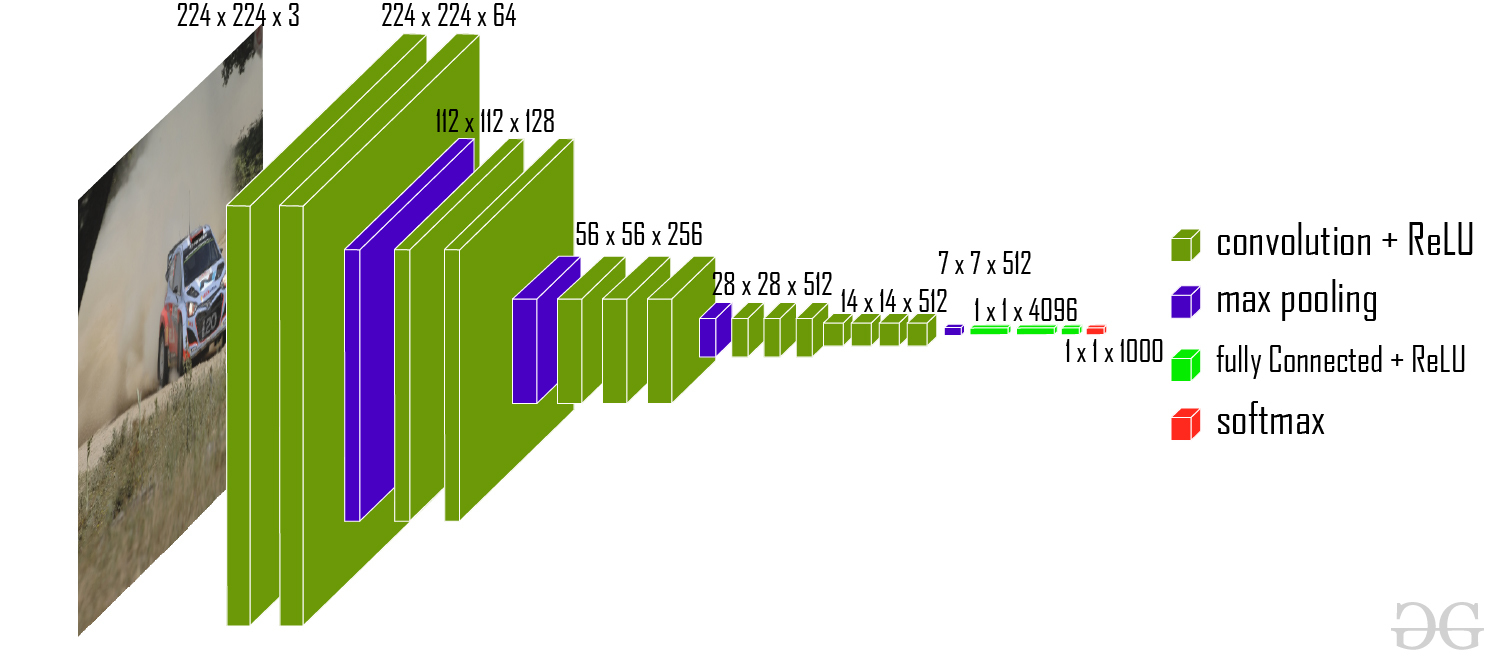

## VGG Architecture 🏗️
The VGG-16 architecture is a deep convolutional neural network (CNN) designed for image classification tasks. VGG-16 is characterized by its simplicity and uniform architecture, making it easy to understand and implement.

It typically consists of 16 layers, including 13 convolutional layers and 3 fully connected layers. These layers are organized into blocks, with each block containing multiple convolutional layers followed by a max-pooling layer for downsampling.

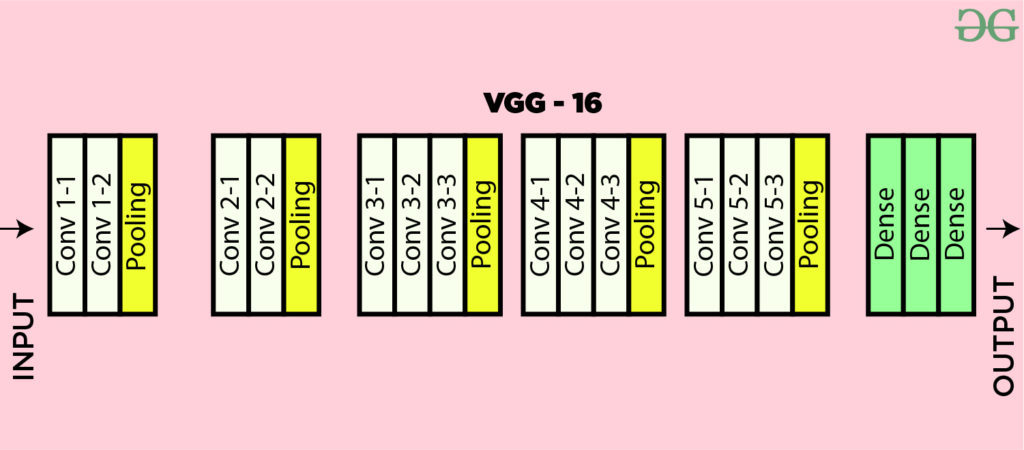

Here's a breakdown of the VGG-16 architecture based on the provided details:

### 1. Input Layer:

- Input dimensions: (224, 224, 3)

### 2. Convolutional Layers (64 filters, 3x3 filters, same padding):

- Two consecutive convolutional layers with 64 filters each and a filter size of 3x3.
- Same padding is applied to maintain spatial dimensions.

### 3. Max Pooling Layer (2x2, stride 2):

- Max-pooling layer with a pool size of 2x2 and a stride of 2.

### 4. Convolutional Layers (128 filters, 3x3 filters, same padding):

- Two consecutive convolutional layers with 128 filters each and a filter size of 3x3.

### 5. Max Pooling Layer (2x2, stride 2):

- Max-pooling layer with a pool size of 2x2 and a stride of 2.

### 6. Convolutional Layers (256 filters, 3x3 filters, same padding):

- Two consecutive convolutional layers with 256 filters each and a filter size of 3x3.

### 7. Convolutional Layers (512 filters, 3x3 filters, same padding):

- Two sets of three consecutive convolutional layers with 512 filters each and a filter size of 3x3.

### 8. Max Pooling Layer (2x2, stride 2):

- Max-pooling layer with a pool size of 2x2 and a stride of 2.

### 9. Stack of Convolutional Layers and Max Pooling:

- Two additional convolutional layers after the previous stack.
- Filter size: 3x3.

### 10. Flattening:

- Flatten the output feature map (7x7x512) into a vector of size 25088.

### 11. Fully Connected Layers:

- Three fully connected layers with ReLU activation.
- First layer with input size 25088 and output size 4096.
- Second layer with input size 4096 and output size 4096.
- Third layer with input size 4096 and output size 1000, corresponding to the 1000 classes in the ILSVRC challenge.
- Softmax activation is applied to the output of the third fully connected layer for classification.

This architecture follows the specifications provided, including the use of ReLU activation function and the final fully connected layer outputting probabilities for 1000 classes using softmax activation.


## 💡 Innovations:
- Simplicity: same kernel size (3×3), deeper network.
  
- Emphasis on depth as the key to improved performance.

  
## ✅ Advantages:

- Extremely simple to implement (just repeated conv layers).
  
- Very effective feature extractor (used in transfer learning).

  
## ❌ Disadvantages:
- Huge model size (~138M parameters).
  
- Computationally expensive (not suitable for real-time/edge devices).

## ⚠️ Limitations Of VGG 16:

- It is very slow to train.

- The size of VGG-16 trained imageNet weights is 528 MB. So it takes quite a lot of disk space and bandwidth which makes it inefficient.

- 138 million parameters lead to exploding gradients problem.

  
Key Insight: Depth + uniform small filters = powerful representation learning.

---

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_vgg16(input_shape=(224, 224, 3), num_classes=1000):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),
        
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),
        
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),
        
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),
        
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), strides=2),
        
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Instantiate the model
vgg16_model = build_vgg16()
vgg16_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

## ✅ Key Features

Uniform Architecture: Consistent use of 3×3 convolution filters and 2×2 max-pooling layers.

Depth: Increased depth allows the network to learn more complex features.

Performance: Achieved 92.7% top-5 accuracy on the ImageNet dataset.

## ⚠️ Limitations

Model Size: Approximately 138 million parameters, leading to large model size.

Computational Resources: Requires significant computational power for training and inference.

Training Time: Long training times due to the depth and number of parameters.

---

# 🅳 GoogLeNet / Inception (2014) 🌐

GoogLeNet (Inception V1) is a deep convolutional neural network architecture designed for efficient image classification. It introduces the Inception module, which performs multiple convolution operations (1x1, 3x3, 5x5) in parallel, along with max pooling and concatenates their outputs. The architecture is deep, yet optimized for speed and performance, which makes it suitable for large-scale visual recognition tasks. It brought forward innovative architectural choices such as 1×1 convolutions, global average pooling and the Inception module, all aimed at improving depth and computational efficiency.

- Purpose: Build deep networks without exploding parameter count.
  
- Architecture:

Inception modules: parallel filters (1×1, 3×3, 5×5) + pooling, outputs concatenated.

Depth: 22 layers, but only ~5M parameters.

## 💡 Innovations:
- 1×1 convolutions → dimensionality reduction.
  
- Inception module → multi-scale feature extraction.


## 🧱 Key Features of GoogLeNet

The GoogLeNet architecture is very different from previous architectures such as AlexNet and ZF-Net. It uses many different kinds of methods such as:

### **1. 1×1 Convolutions**

One of the core techniques employed in GoogLeNet is the use of 1×1 convolutions, primarily for dimensionality reduction. These layers help decrease the number of trainable parameters while enabling deeper and more efficient architectures.

**Example Comparison:**

- Without 1×1 Convolution:(14×14×48)×(5×5×480)=112.9M operations

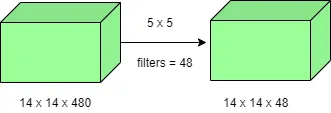

- With 1×1 Convolution:(14×14×16)×(1×1×480)+(14×14×48)×(5×5×16)=5.3M operations

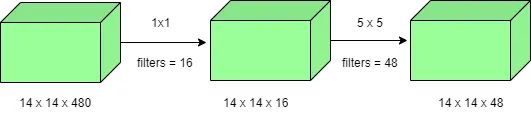

This results in a massive reduction in computation without compromising performance.

### **2.** Global Average Pooling

In traditional architectures like AlexNet, fully connected layers at the end introduce a large number of parameters. GoogLeNet replaces these with Global Average Pooling, which computes the average of each feature map (e.g. converting 7×7 maps to 1×1), this significantly reduces the model’s parameter count and solves overfitting.

**Benefits:**

- Zero additional trainable parameters

- Reduces overfitting

  
- Improves top-1 accuracy by approximately 0.6%

### 3. Inception Module

The Inception module is the architectural core of GoogLeNet. It processes the input using multiple types of operations in parallel, including 1×1, 3×3, 5×5 convolutions and 3×3 max pooling. The outputs from all paths are concatenated depth-wise.

- Purpose: Enables the network to capture features at multiple scales effectively.
  
- Advantage: Improves representational power without dramatically increasing computation.

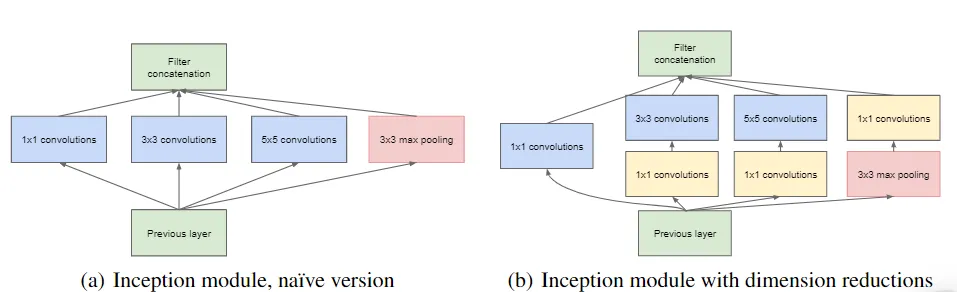

### 4. Auxiliary Classifiers

To address the vanishing gradient problem during training, GoogLeNet introduces auxiliary classifiers(intermediate branches that act as smaller classifiers). These are active only during training and help regularize the network.

**Structure of Each Auxiliary Classifier:**

- Average pooling layer (5×5, stride 3)
  
- 1×1 convolution (128 filters, ReLU)

  
- Fully connected layer (1024 units, ReLU)

  
- Dropout layer (dropout rate = 0.7)

  
- Fully connected softmax layer (1000 classes)

  
- The auxiliary losses are added to the main loss with a weight of 0.3 to stabilize training.

### **5. Model Architecture**

GoogLeNet is a 22-layer deep network (excluding pooling layers) that emphasizes computational efficiency, making it feasible to run even on hardware with limited resources. Below is Layer by Layer architectural details of GoogLeNet.

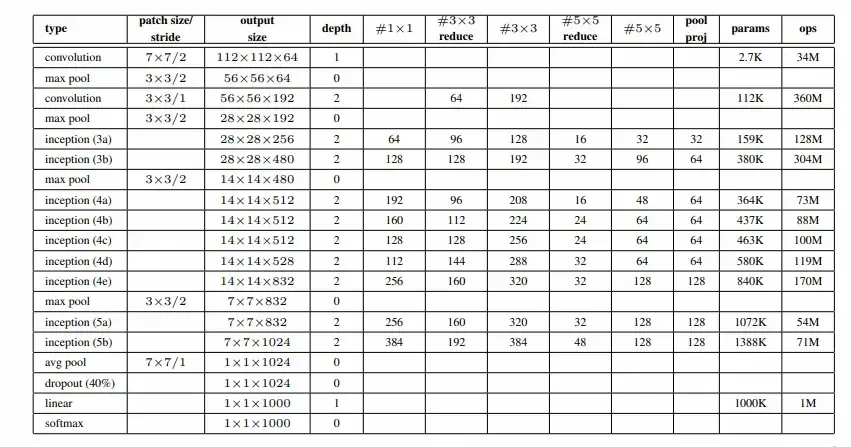

The architecture also contains two auxiliary classifier layer connected to the output of Inception (4a) and Inception (4d) layers.

## Inception V1 architecture

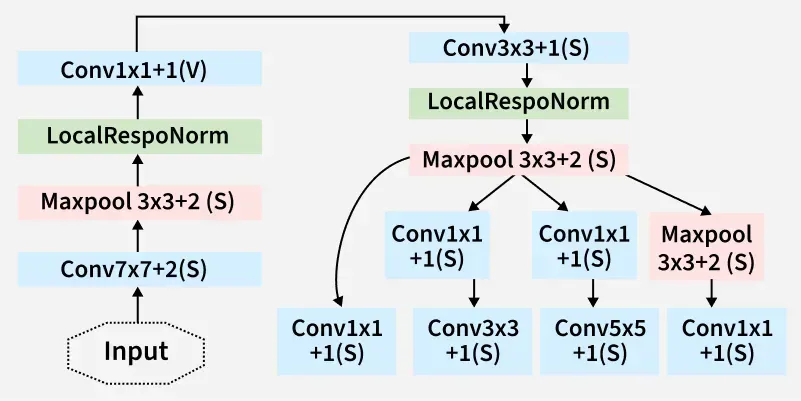


## **Key highlights of the architecture:**

- Input Layer: Accepts a 224×224 RGB image as input.
  
- Initial Convolutions and Pooling: Applies a series of standard convolutional and max pooling layers to downsample the input and extract low-level features.

  
- Local Response Normalization (LRN): Normalizes the feature maps early in the network to improve generalization.

  
- Inception Modules: Each module processes the input through 1×1, 3×3, and 5×5 convolutions, as well as 3×3 max pooling, all in parallel. The outputs are concatenated along the depth dimension, allowing the network to capture both fine and coarse features.

  
- Auxiliary Classifiers: Appear as smaller branches connected to intermediate layers of the network. Include average pooling, 1×1 convolutions, fully connected layers, and softmax outputs.

  
- Final Layers: Uses global average pooling (7×7) to reduce each feature map to a single value. Followed by a fully connected layer and a softmax activation to produce the final classification output.

# 🏆 Performance and Results

- Winner of ILSVRC 2014 in both classification and detection tasks
  
- Achieved a top-5 error rate of 6.67% in image classification
  
- An ensemble of six GoogLeNet models achieved 43.9% mAP (mean Average Precision) on the ImageNet detection task

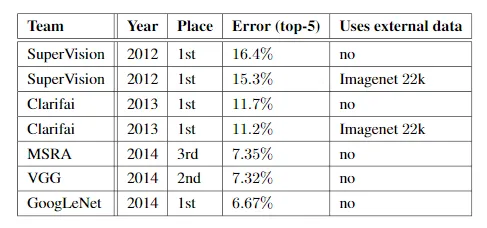

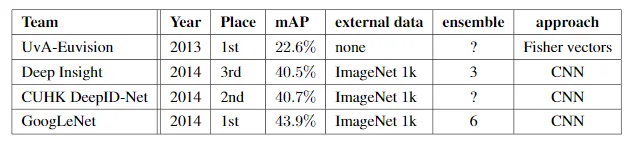

## ✅ Advantages:
- Efficient (5M params vs 138M in VGG).
  
- Captures fine + coarse features simultaneously.

  
## ❌ Disadvantages:
- Complex architecture → harder to customize.
  
- Requires careful design choices for each stage.

  
🔑 Key Insight: Network width + modular design = efficiency with depth.

---

In [8]:
import torch
import torch.nn as nn

class InceptionModule(nn.Module):
    def __init__(self, in_channels, out_1x1, red_3x3, out_3x3, red_5x5, out_5x5, out_pool):
        super(InceptionModule, self).__init__()

        # 1x1 convolution branch
        self.branch1x1 = nn.Conv2d(in_channels, out_1x1, kernel_size=1)

        # 1x1 convolution followed by 3x3 convolution branch
        self.branch3x3 = nn.Sequential(
            nn.Conv2d(in_channels, red_3x3, kernel_size=1),
            nn.Conv2d(red_3x3, out_3x3, kernel_size=3, padding=1)
        )

        # 1x1 convolution followed by 5x5 convolution branch
        self.branch5x5 = nn.Sequential(
            nn.Conv2d(in_channels, red_5x5, kernel_size=1),
            nn.Conv2d(red_5x5, out_5x5, kernel_size=5, padding=2)
        )

        # Max pooling followed by 1x1 convolution branch
        self.branch_pool = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, out_pool, kernel_size=1)
        )

    def forward(self, x):
        branch1x1 = self.branch1x1(x)
        branch3x3 = self.branch3x3(x)
        branch5x5 = self.branch5x5(x)
        branch_pool = self.branch_pool(x)

        # Concatenate the outputs along the channel dimension
        return torch.cat([branch1x1, branch3x3, branch5x5, branch_pool], 1)

# Example usage of the InceptionModule
if __name__ == '__main__':
    # Input tensor (batch_size, channels, height, width)
    input_tensor = torch.randn(1, 3, 224, 224)

    # Create an Inception module instance
    # Parameters: in_channels, out_1x1, red_3x3, out_3x3, red_5x5, out_5x5, out_pool
    inception_block = InceptionModule(3, 64, 96, 128, 16, 32, 32)

    # Pass the input through the Inception module
    output_tensor = inception_block(input_tensor)

    print(f"Input shape: {input_tensor.shape}")
    print(f"Output shape: {output_tensor.shape}")

Input shape: torch.Size([1, 3, 224, 224])
Output shape: torch.Size([1, 256, 224, 224])


## Explanation

- Imports: Uses torch and torch.nn for tensor operations and defining neural network layers. 🧠

- InceptionModule class: Custom PyTorch module representing a single Inception block from GoogLeNet. 🏗️

- Branches: Four parallel paths for feature extraction:

    - 1×1 conv → captures simple features.

    - 1×1 → 3×3 conv → reduces dimensions then extracts medium-scale features.

    - 1×1 → 5×5 conv → reduces dimensions then extracts larger-scale features.

    - 3×3 max pooling → 1×1 conv → extracts robust features while reducing spatial info.

- Forward method:

    - Applies all four branches to the input x.

    - Concatenates outputs along channel dimension (dim=1). ✅

- Example usage:

    - Input tensor: (batch_size=1, channels=3, height=224, width=224) 🖼️

    - Inception block instance: (3 → 64, 96→128, 16→32, 32)

    - Pass input through block → output shape shows concatenated channels.

- Prints shapes:

    - Input shape: (1, 3, 224, 224)

    - Output shape: (1, sum of all branch output channels, 224, 224) → shows combined features from all branches.
 
---

# 🅴 ResNet (2015)

In order to solve the problem of the vanishing/exploding gradient, this architecture introduced the concept called Residual Blocks. In this network, we use a technique called skip connections. The skip connection connects activations of a  layer to further layers by skipping some layers in between. This forms a residual block. Resnets are made by stacking these residual blocks together. The approach behind this network is instead of layers learning the underlying mapping, we allow the network to fit the residual mapping. So, instead of say H(x), initial mapping, let the network fit,

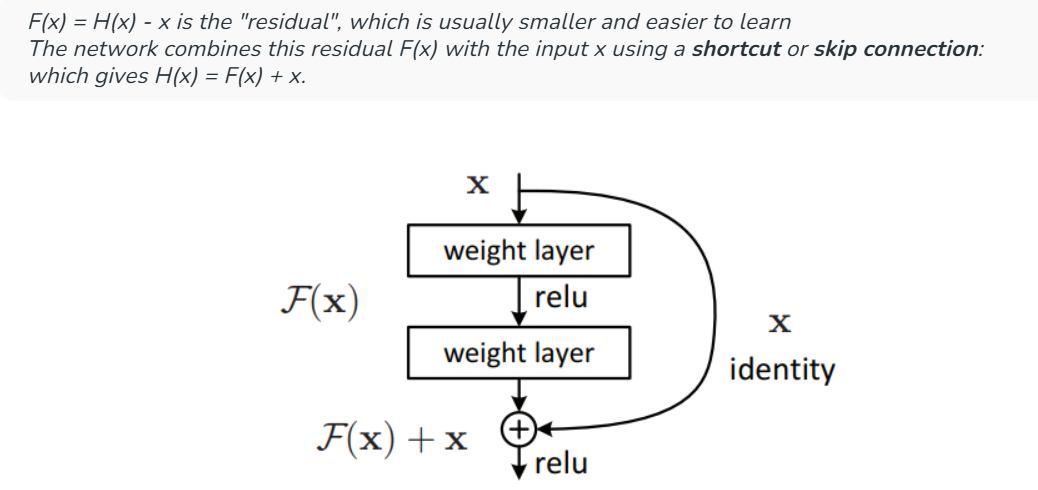

- Purpose: Solve vanishing gradient problem in deep networks.
  
- Architecture:

- Introduced Residual Blocks:

    - y=F(x)+x → identity skip connection.

    - Versions: ResNet-50, ResNet-101, ResNet-152.

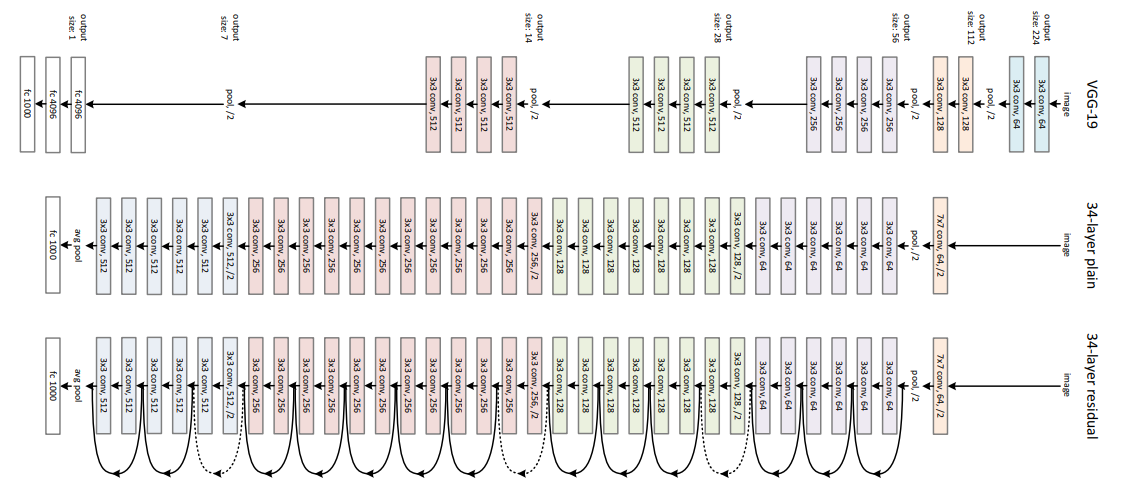

## Innovations:
- Skip connections allow training of >100 layers without degradation.
  
- Paved way for ultra-deep networks.

## 📈 Performance

- ImageNet 2015: ResNet won the ImageNet Large Scale Visual Recognition Challenge with a top-5 error rate of 3.57%.

- Deeper Networks: ResNet allows for the training of networks with hundreds or even thousands of layers without performance degradation.

## ResNet-34 Architecture

The first ResNet architecture was the Resnet-34 which involved the insertion of shortcut connections in turning a plain network into its residual network counterpart. In this case, the plain network was inspired by VGG neural networks (VGG-16, VGG-19), with the convolutional networks having 3×3 filters. However, compared to VGGNets, ResNets have fewer filters and lower complexity. The 34-layer ResNet achieves a performance of 3.6 bn FLOPs, compared to 1.8bn FLOPs of smaller 18-layer ResNets.

It also followed two simple design rules – the layers had the same number of filters for the same output feature map size, and the number of filters doubled in case the feature map size was halved in order to preserve the time complexity per layer. It consisted of 34 weighted layers.

The shortcut connections (Skip connections) were added to this plain network. While the input and output dimensions were the same, the identity shortcuts were directly used. With an increase in the dimensions, there were two options to be considered. The first was that the shortcut would still perform identity mapping while extra zero entries would be padded for increasing dimensions. The other option was to use the projection shortcut to match dimensions.

## Resnet-50 Architecture
 
While the Resnet50 architecture is based on the above model, there is one major difference. In this case, the building block was modified into a bottleneck design due to concerns over the time taken to train the layers. This used a stack of 3 layers instead of the earlier 2.

Therefore, each of the 2-layer blocks in Resnet34 was replaced with a 3-layer bottleneck block, forming the Resnet 50 architecture. This has much higher accuracy than the 34-layer ResNet model. The 50-layer ResNet achieves a performance of 3.8 bn FLOPS.

## Deep Residual Learning for Image Recognition

- Deeper neural networks are more difficult to train.

- With ResNet, it becomes possible to surpasses difficulties of training very deep neural networks.

  
## ⚙️ Advantages

- Mitigates Vanishing Gradient: Skip connections help maintain gradient flow.

- Enables Deeper Networks: Facilitates the training of very deep networks.

- Improved Accuracy: Achieves better performance on tasks like image classification.
  
## ⚠️ Limitations

- Increased Complexity: Deeper networks can be more complex to train and require more computational resources.

- Overfitting: Without proper regularization, very deep networks may overfit to training data.

## 🛠️ Applications

- Image Classification: Used in tasks like object recognition and scene understanding.

- Transfer Learning: Pre-trained ResNet models are used as feature extractors for various tasks.

- Object Detection: Integrated into frameworks like Faster R-CNN for detecting objects in images.

  
- Key Insight: Skip connections → solve optimization bottleneck in deep learning.

---

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F


## Explanation:

- torch → main PyTorch library

- torch.nn → contains neural network layers like Conv2D, Linear

- torch.nn.functional → contains functions like relu, used in forward pass

In [11]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        # First conv layer
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        # Second conv layer
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Shortcut (identity or 1x1 conv if dimensions change)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != self.expansion*out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion*out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)  # Residual connection
        out = F.relu(out)
        return out


## Explanation:

- Defines one residual block of ResNet.

- Two conv layers + batch normalization + ReLU.

- Shortcut connection: adds input x to output to prevent vanishing gradients.

- If input/output sizes differ, a 1x1 conv adjusts dimensions.

In [12]:
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 64

        # Initial conv layer
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        
        # Residual layers
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        
        # Pooling + Fully connected layer
        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for s in strides:
            layers.append(block(self.in_channels, out_channels, s))
            self.in_channels = out_channels * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = torch.flatten(out, 1)
        out = self.fc(out)
        return out


## Explanation:

- Stacks multiple residual blocks to form full ResNet.

- _make_layer → creates a sequence of residual blocks for a layer.

- Adaptive average pooling → converts feature map to (batch_size, channels, 1, 1).

- Fully connected layer → outputs class logits.

In [13]:
def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


## Explanation:

- Builds ResNet-18: 4 layers with [2,2,2,2] residual blocks.

- Follows standard ResNet-18 architecture.

In [14]:
# Example usage
model = ResNet18()
x = torch.randn(1, 3, 32, 32)  # Example input (like CIFAR-10)
y = model(x)
print("Input shape:", x.shape)
print("Output shape:", y.shape)  # Should be (1,10)


Input shape: torch.Size([1, 3, 32, 32])
Output shape: torch.Size([1, 10])


## Explanation:

- Creates random input tensor (1,3,32,32) → simulates CIFAR-10 image.

- Passes input through ResNet-18.

- Output → (1,10) representing 10 class logits.

---

# 🅵 DenseNet (2017)


DenseNet, short for Dense Convolutional Network, is a deep learning architecture for cnn  introduced by Gao Huang, Zhuang Liu, Laurens van der Maaten, and Kilian Q. Weinberger in their paper titled "Densely Connected Convolutional Networks" published in 2017. DenseNet revolutionized the field of computer vision by proposing a novel connectivity pattern within CNNs, addressing challenges such as feature reuse, vanishing gradients, and parameter efficiency. Unlike traditional CNN architectures where each layer is connected only to subsequent layers, DenseNet establishes direct connections between all layers within a block. This dense connectivity enables each layer to receive feature maps from all preceding layers as inputs, fostering extensive information flow throughout the network.

- Purpose: Feature reuse + efficiency.
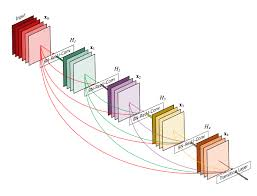

## 🔑 Key Characteristics of DenseNet

1. Alleviated Vanishing Gradient Problem: Dense connections ensure that gradients can flow directly to earlier layers, mitigating the vanishing gradient issue common in deep networks.

2. Improved Feature Propagation: Each layer has direct access to the gradients from the loss function and the original input signal, promoting better feature propagation.


3. Feature Reuse: By concatenating features from all preceding layers, DenseNet encourages feature reuse, reducing redundancy and improving efficiency.

4. Reduced Parameters: Despite its dense connections, DenseNet is parameter-efficient. It eliminates the need to relearn redundant features, resulting in fewer parameters compared to traditional networks.


## 🏗 Architecture:

DenseNet introduces a paradigm shift by connecting each layer to every other layer in a feed-forward manner. Unlike traditional CNNs, which have a single connection between consecutive layers, DenseNet ensures that each layer receives inputs from all preceding layers and passes its output to all subsequent layers. This results in a network with L(L+1)/2 direct connections for L layers, significantly enhancing information flow.

- Dense Blocks: each layer connected to all previous layers.
  
- Transition layers: 1×1 conv + pooling to control size.

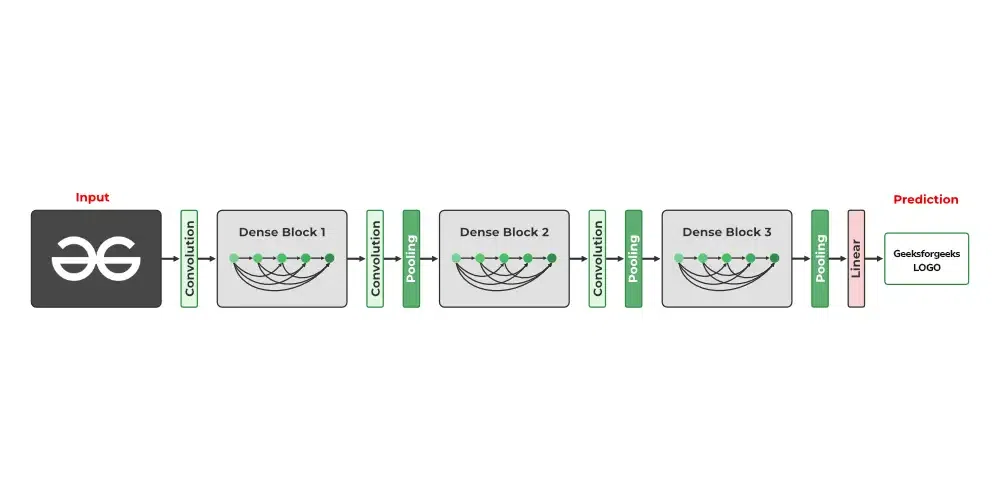

## ✨ Innovations:
- Maximizes feature reuse → efficient learning.
  
- Strong gradient flow → combats vanishing gradients.

## 🔄 Transition Layer

Transition layers are used to connect dense blocks. They serve two main purposes: reducing the number of feature maps and downsampling the spatial dimensions of the feature maps. This helps in maintaining the computational efficiency and compactness of the network. A typical transition layer consists of:

- **Batch Normalization**: Normalizes the feature maps.
- **1x1 Convolution**: Reduces the number of feature maps.
- **Average Pooling**: Downsamples the spatial dimensions.

## 📈 Growth Rate (k)

The growth rate ( k ) is a critical hyperparameter in DenseNet. It defines the number of feature maps each layer in a dense block produces. A larger growth rate means more information is added at each layer, but it also increases the computational cost. The choice of k affects the network's capacity and performance.

## 🖥 DenseNet Variants

DenseNet comes in several variants, distinguished primarily by their depth and number of layers:

- **DenseNet-121**: Contains 121 layers, known for its balanced trade-off between computational efficiency and accuracy. Ideal for tasks requiring moderate computational resources.
  
- **DenseNet-169**: With 169 layers, this variant provides deeper feature extraction, suitable for more complex datasets where higher accuracy is needed.

  
- **DenseNet-201 and DenseNet-264**: These variants offer even deeper architectures, suitable for highly complex tasks requiring extensive feature representation.

| **Variant** | **Layers** | **Parameters** | **Typical Use Cases** |
| --- | --- | --- | --- |
| DenseNet-121 | 121 | 7.98M | General-purpose image classification, object detection |
| DenseNet-169 | 169 | 14.15M | Advanced image recognition, medical image analysis |
| DenseNet-201 | 201 | 20.01M | High-accuracy tasks, detailed feature extraction |
| DenseNet-264 | 264 | 33.34M | Complex visual tasks, extensive datasets |

Each variant caters to different computational and accuracy requirements, allowing flexibility in model selection based on the specific needs of the task at hand.

## ✅ Advantages:
- Reduced Vanishing Gradient Problem: Dense connections improve gradient flow and facilitate the training of very deep networks.

- Feature Reuse: Each layer has access to all preceding layers' feature maps, promoting the reuse of learned features and enhancing learning efficiency.

- Fewer Parameters: DenseNets often have fewer parameters compared to traditional CNNs with similar depth due to efficient feature reuse.

- Improved Accuracy: DenseNets have shown high accuracy on various benchmarks, such as ImageNet and CIFAR.
  
## ❌ Disadvantages:
- Memory intensive (many concatenated feature maps).
  
- Forward/backward passes are slower.

## 🎯 Applications of DenseNet
- DenseNet is versatile and can be applied to various tasks in computer vision, including:

- Image Classification: DenseNet's ability to extract rich feature representations makes it suitable for image classification tasks.

- Object Detection: DenseNet can be used as a backbone for object detection networks, providing detailed feature maps for accurate detection.

- Semantic Segmentation: DenseNet's dense connections help in capturing fine details, making it effective for semantic segmentation tasks.  

🔑 Key Insight: Dense connectivity = efficient learning + better generalization.

---

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models


class DenseNetCustom(nn.Module):
    def __init__(self, num_classes=1000):
        super(DenseNetCustom, self).__init__()
        # Using a pre-trained DenseNet-121
        self.densenet = models.densenet121(pretrained=True)
        # Adjust the classifier to match the number of classes
        self.densenet.classifier = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = self.densenet(x)
        return x


# Example usage
model = DenseNetCustom(num_classes=10)
print(model)

C:\Users\bhagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\bhagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to C:\Users\bhagi/.cache\torch\hub\checkpoints\densenet121-a639ec97.pth


100%|█████████████████████████████████████████████████████████████████████████████| 30.8M/30.8M [00:07<00:00, 4.54MB/s]


DenseNetCustom(
  (densenet): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, mome

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DenseLayer(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        # Bottleneck 1x1 conv
        self.conv1 = nn.Conv2d(in_channels, 4 * growth_rate, kernel_size=1, stride=1, bias=False)
        self.bn2 = nn.BatchNorm2d(4 * growth_rate)
        self.conv2 = nn.Conv2d(4 * growth_rate, growth_rate, kernel_size=3, stride=1, padding=1, bias=False)

    def forward(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        out = self.conv2(self.relu(self.bn2(out)))
        # Concatenate input and output (dense connectivity)
        return torch.cat([x, out], dim=1)


class TransitionLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.bn = nn.BatchNorm2d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        out = self.conv(self.relu(self.bn(x)))
        out = self.avg_pool(out)
        return out


class DenseNet121(nn.Module):
    def __init__(self, growth_rate=32, block_layers=(6, 12, 24, 16), num_classes=1000):
        super().__init__()
        # Initial convolution + pooling
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.features = nn.Sequential()
        num_channels = 64

        # Build dense blocks and transition layers
        for i, num_layers in enumerate(block_layers):
            # Dense Block
            block = nn.Sequential()
            for j in range(num_layers):
                layer = DenseLayer(num_channels, growth_rate)
                block.add_module(f"denseblock_{i+1}_layer_{j+1}", layer)
                num_channels += growth_rate
            self.features.add_module(f"denseblock_{i+1}", block)

            # Transition layer (except after last block)
            if i != len(block_layers) - 1:
                out_channels = num_channels // 2
                trans = TransitionLayer(num_channels, out_channels)
                self.features.add_module(f"transition_{i+1}", trans)
                num_channels = out_channels

        # Final batch norm
        self.bn_final = nn.BatchNorm2d(num_channels)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(num_channels, num_classes)

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.maxpool(out)
        out = self.features(out)
        out = self.relu(self.bn_final(out))
        out = self.avgpool(out)
        out = torch.flatten(out, 1)
        return self.fc(out)


# ✅ Example usage
if __name__ == "__main__":
    model = DenseNet121(num_classes=1000)
    x = torch.randn(1, 3, 224, 224)  # sample input image
    y = model(x)
    print("Output shape:", y.shape)  # should be [1, 1000]

Output shape: torch.Size([1, 1000])


# EXPLANATION 

## DenseLayer

- BN → ReLU → 1×1 Conv (bottleneck) → BN → ReLU → 3×3 Conv

- Output concatenated with input (dense connectivity)

- Adds growth_rate channels per layer

## TransitionLayer

- BN → ReLU → 1×1 Conv → AvgPool2d(2×2)

- Reduces channel count and spatial size

## DenseNet121

- Initial: 7×7 Conv → BN → ReLU → MaxPool

- 4 Dense Blocks (6,12,24,16 layers) separated by Transition Layers

- Final: BN → ReLU → AdaptiveAvgPool(1×1) → FC classifier

- Forward: Input → initial Conv → Dense/Transition → final BN → pool → flatten → FC

---

## 3️⃣ Advantages & Disadvantages of CNNs
### ✅ Advantages

- Automatic feature extraction → no hand-crafted features required.
  
- Spatial hierarchies → captures simple → complex patterns.

  
- Parameter sharing → fewer weights than fully connected networks.

  
- State-of-the-art performance in vision, detection, segmentation, etc.

  
- Transfer learning → pretrained CNNs generalize well to new tasks.

### ❌ Disadvantages

- High computational cost → GPUs/TPUs required.
  
- Memory heavy → especially VGG/AlexNet.

  
- Large dataset requirement → prone to overfitting with small data.

  
- Architecture complexity → modern designs (Inception, ResNet, DenseNet) are harder to implement from scratch.

  
- Training time → long, expensive.

---

## 4️⃣ Comparing all CNN Architectures

| **Aspect** | **DenseNet** | ResNet | VGG | Inceotion (Google Net) | AlexNet |
| --- | --- | --- | --- | --- | --- |
| **Connectivity** | Dense connections | Shortcut connections | Sequential | Parallel paths | Sequential |
| **Gradient Flow** | Excellent | Good | Moderate | Good | Moderate |
| **Parameter Efficiency** | High | Moderate | Low | Moderate | Low |
| **Feature Reuse** | Extensive | Some | Minimal | Moderate | Minimal |
| **Vanishing Gradient** | Mitigated | Mitigated | Prone | Mitigated | Prone |
| **Depth** | Very deep, fewer parameters | Very deep | Deep, limited by training | Deep | Shallow compared to modern |
| **Computational Cost** | Moderate, higher memory usage | Moderate to high | High | Moderate | Moderate to high |
| **Training Complexity** | Moderate | Moderate to high | High | Moderate | Moderate |
| **Performance** | High, state-of-the-art | High, state-of-the-art | Good, but outperformed | High, competitive | Good for its time |
| **Applications** | Classification, detection, segmentation | Classification, detection, segmentation | Classification, feature extraction | Classification, detection, segmentation | Classification, early benchmarks |
| **Introduced** | 2017 | 2015 | 2014 | 2015 | 2012 |
    
---

## 5️⃣ Simple CNN Workflow Example (MNIST Classification)

1. Input: 28×28 grayscale image.
2. Conv2D (3×3 filter) + ReLU → detects edges and corners.
3. MaxPooling2D (2×2) → reduces size, keeps strongest features.
4. Flatten → converts feature map into 1D vector.
5. Dense Layer(s) → learns class-level patterns.
6. Softmax Output → assigns probabilities to 10 digits (0–9).

👉 Achieves ~96–97% test accuracy with a simple CNN.

---


# **Modern CNN Variants:**

# EfficientNet (scaling)📘

## 1. Introduction 🔹

- EfficientNet → Family of CNN architectures introduced by Mingxing Tan & Quoc V. Le (Google Research, 2019).
  
- Goal → High performance with fewer computational resources compared to older CNNs (ResNet, Inception, DenseNet).

  
- Core idea → Compound Scaling → uniformly scale depth, width, and resolution using a coefficient (φ).

## 2. EfficientNet-B0 Architecture Overview🏗️

### Stem

- First layer: Conv3×3, stride = 2, 32 filters.
  
- Followed by BatchNorm + ReLU6 activation.

### Body

- Stack of MBConv (Mobile Inverted Bottleneck Convolution) blocks.
  
- Each MBConv includes:
    - Depthwise separable convs (lightweight).
    - Squeeze-and-Excitation (SE) blocks for attention.
      
- Parameters in each MBConv:
    - Expansion ratio → how much channels are expanded.
    - Kernel size → 3×3, 5×5.
    - Stride → stride length.
    - SE ratio → controls how aggressively SE compresses channels.

### Head

- Final Conv1×1 block.
  
- Global Average Pooling.

  
- Fully Connected (Dense) + Softmax for classification.

---

## 3. EfficientNet-B0 Detailed Architecture📊

| Stage | Operator | Resolution | Channels | Layers |
| --- | --- | --- | --- | --- |
| 1 | Conv3×3 | 224×224 | 32 | 1 |
| 2 | MBConv1, k3×3 | 112×112 | 16 | 1 |
| 3 | MBConv6, k3×3 | 112×112 | 24 | 2 |
| 4 | MBConv6, k5×5 | 56×56 | 40 | 2 |
| 5 | MBConv6, k3×3 | 28×28 | 80 | 3 |
| 6 | MBConv6, k5×5 | 14×14 | 112 | 3 |
| 7 | MBConv6, k5×5 | 14×14 | 192 | 4 |
| 8 | MBConv6, k3×3 | 7×7 | 320 | 1 |
| 9 | Conv1×1 + Pool + FC | 7×7 | 1280 | 1 |

---

## 4. Compound Scaling Method⚖️

### Problem:

- Old models scale one dimension only (depth OR width OR resolution).
  
- Leads to unbalanced performance/efficiency trade-offs.

### Solution: Compound Scaling

- Scale depth, width, and resolution simultaneously with a compound coefficient φ.
  
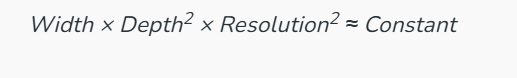

### Scaling Strategies Compared

1. Baseline: original network (no scaling).
2. Width scaling: more channels → better representation, but high memory cost.
3. Depth scaling: more layers → captures more hierarchy, but vanishing gradient risk.
4. Resolution scaling: bigger images → higher accuracy, but expensive computation.
5. Compound scaling: balanced scaling across all three → best efficiency.

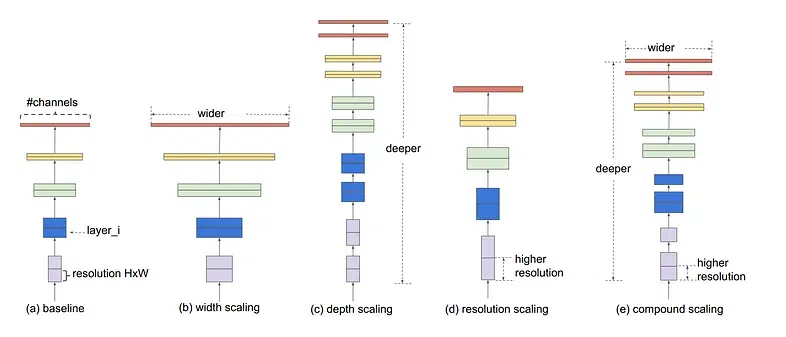

---

## 5. Key Components🔑

### (a) Depthwise Separable Convolutions

- Split normal convolution into:
    1. Depthwise conv → filter applied per channel.
    2. Pointwise conv (1×1) → combines across channels.
       
- Cuts down computation while keeping representational power.


### (b) Inverted Residual Blocks (MBConv)

- Inspired by MobileNetV2.
  
- Structure: Narrow → Wide → Narrow.
    1. Expansion Phase: 1×1 conv expands channels.
    2. Depthwise conv: lightweight 3×3/5×5 conv.
    3. Projection Phase: 1×1 conv compresses back.
    4. Skip connections if stride=1 and input=output shape.
       
- Squeeze-and-Excitation (SE) layer → adds channel attention.

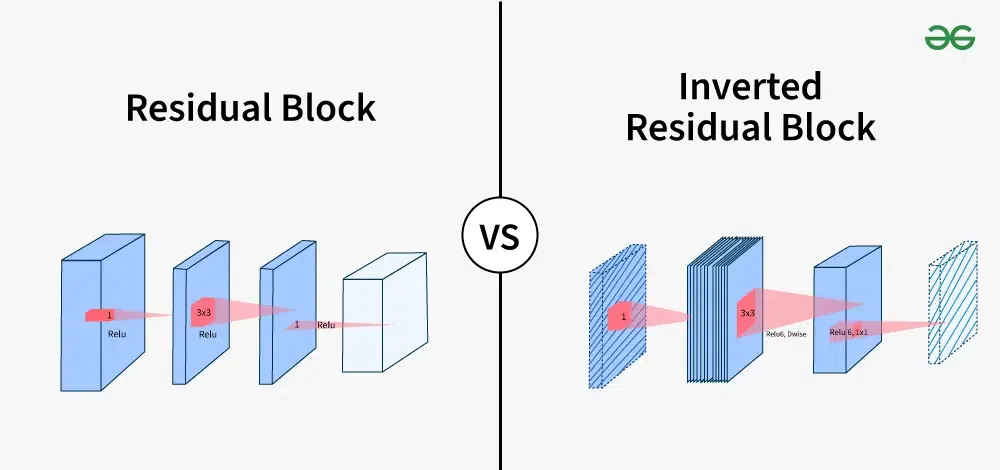

### (c) Efficient Attention Mechanism

- SE (Squeeze-and-Excitation) recalibrates channels:
    - "Squeeze" → global avg pooling.
    - "Excite" → fully connected + sigmoid → channel weights.
      
- Helps focus on important features.

---

## 6. Variants of EfficientNet 🧬

EfficientNet offers several variants, denoted by scaling coefficients like B0, B1, B2, etc. These variants differ in depth, width, and resolution based on the compound scaling approach. For example:

- EfficientNet-B0: The baseline model with moderate depth, width, and resolution.

- EfficientNet-B1 to B7: Successively larger variants achieved by increasing the compound scaling coefficient φ.

- EfficientNet-Lite: Lightweight variants designed for mobile and edge devices, achieving a good balance between performance and efficiency.

  
Each variant of EfficientNet offers a trade-off between model size, computational cost, and performance, catering to various deployment scenarios and resource constraints.

---

## 7. Performance 🚀

- On ImageNet:
    - EfficientNet-B7 → 84.4% top-1, 97.3% top-5.
    - ~6.1× faster & 8.4× smaller than older SOTA CNNs.
      
- On CIFAR-100 → 91.7% accuracy.

  
- On Flowers dataset → 98.8% accuracy.

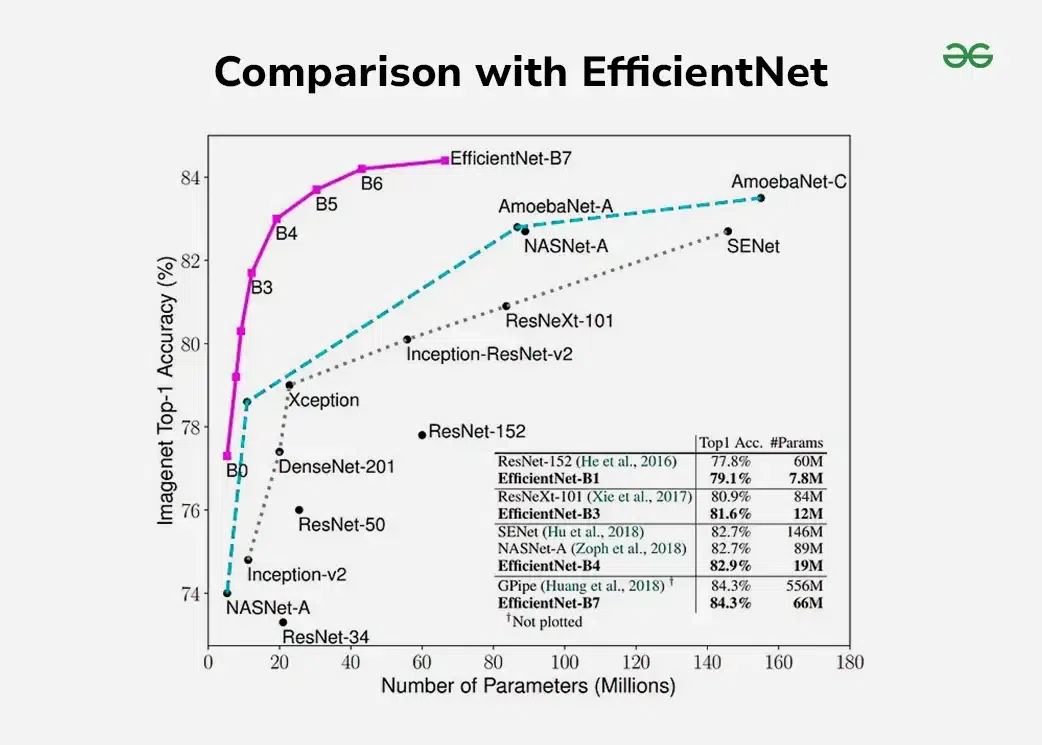

### ⚡ Efficiency: 
EfficientNet achieves state-of-the-art accuracy on ImageNet with significantly fewer parameters and FLOPS compared to previous models like ResNet, DenseNet, and Inception.

### 🎯 Performance: 
Due to the balanced scaling method, EfficientNet models provide an excellent trade-off between accuracy and computational efficiency, making them suitable for deployment in resource-constrained environments.

---

## 8. Conclusion

- EfficientNet proves that scaling must be balanced.
  
- Combines:
    - Compound scaling method.
    - Inverted residual blocks.
    - Depthwise separable convolutions.
    - Squeeze-and-Excitation attention.
      
- Result: State-of-the-art accuracy with high efficiency.

  
- Scalable design → works for both server-level and edge-level tasks.

---
---

# MobileNet, ShuffleNet (lightweight for edge devices)

# 📱 MobileNet

## 1. Introduction

- Proposed by Google (2017).
  
- Designed for mobile & embedded vision applications.

  
- Core idea: Replace heavy convolutions with Depthwise Separable Convolutions to reduce computation & model size.

---

## 2. Key Concepts

### (a) Standard Convolution Cost

- Normal Conv: Applies filters across all input channels.
  
- Computation-heavy (esp. with high input resolution & channels).

### (b) Depthwise Separable Convolution

- Factorizes standard convolution into:
  
    1. Depthwise Conv → apply one filter per channel.
    2. Pointwise Conv (1×1) → combine across channels.
       
- Reduces computation by 8–9× vs normal conv.

👉 Formula:

Cost reduction ≈ 1/k² + 1/N

(where k = kernel size, N = #channels)

---

## 3. Architecture (MobileNetV1)

- Layers: Mostly Depthwise + Pointwise conv.
  
- Uses ReLU6 activation (stable for low precision).

  
- Two hyperparameters for trade-off:
    - Width multiplier (α) → shrinks channels.
    - Resolution multiplier (ρ) → shrinks input size.

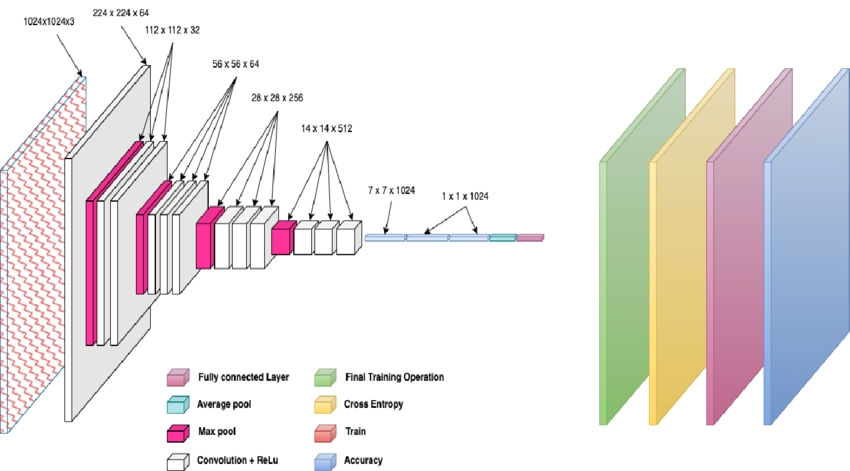

---

## 4. Variants

- **MobileNetV1 (2017):** Introduced depthwise separable convs.

- **MobileNetV2 (2018):**
    - Added Inverted Residual Blocks (like EfficientNet MBConv).
    - Linear bottleneck + shortcut connections.

- **MobileNetV3 (2019):**
    - Neural Architecture Search (NAS) + SE (Squeeze-Excite).
    - Better accuracy-latency tradeoff.

---

## 5. Performance

- Extremely lightweight:
    - MobileNetV1 → ~4.2M parameters.
    - MobileNetV2 → higher accuracy with ~3.4M params.

- Accuracy slightly less than ResNet, but far smaller & faster.

- Ideal for edge deployment (phones, IoT, embedded devices).

---

---

# 🔀 ShuffleNet

## 1. Introduction

- Proposed by Megvii (Face++) in 2017.

- Goal: Even lighter than MobileNet for real-time applications.

- Core ideas:
    - **Pointwise group convolutions** → reduce cost of 1×1 conv.
    - **Channel Shuffle** → enable cross-group information flow.

---

## 2. Key Concepts

### (a) Problem with Group Convolution

- Splitting channels into groups reduces computation.
- But → limits info flow (each group learns separately).

### (b) Channel Shuffle

- Solution: Shuffle channels after group conv.

- Ensures information exchange between channel groups.

- Efficiently boosts representational power.

👉 Think of it like shuffling a deck of cards so groups don’t stay isolated.

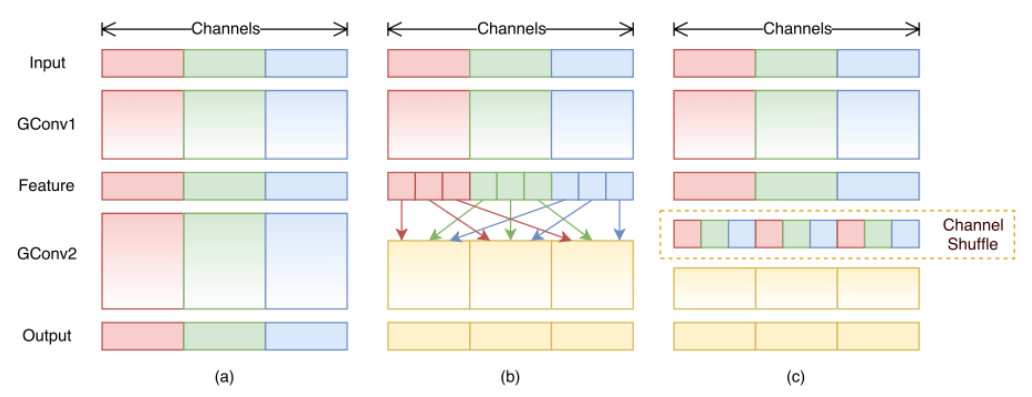

---

## 3. Architecture

- ShuffleNet Unit =
    - 1×1 Group Convolution.
    - Channel Shuffle.
    - Depthwise Convolution (3×3).
    - 1×1 Group Convolution again.
    - Residual/shortcut connection (like ResNet).

- Variants: ShuffleNetV1, ShuffleNetV2.
    
    - V2 improves by reducing memory access cost (MAC) and balancing efficiency.
      
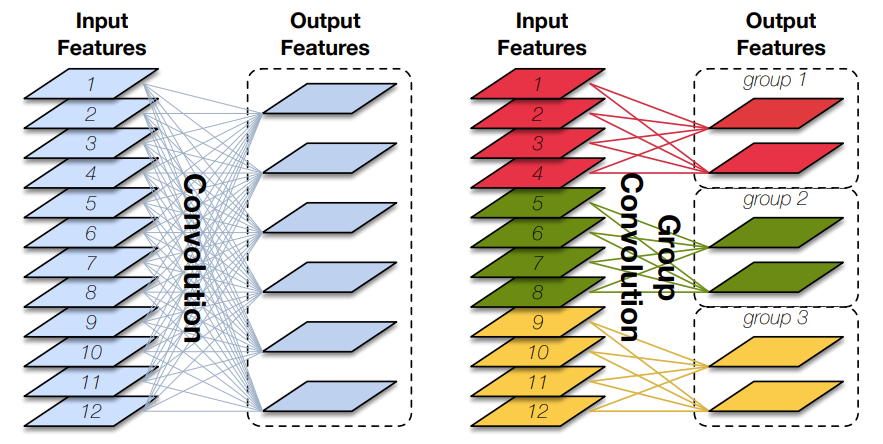

---

## 4. Performance

- Very small models (~1–2M params).
  
- Outperforms MobileNet on some efficiency benchmarks.

  
- Optimized for real-time edge deployment.

- Great for apps like face recognition, mobile AR/VR, robotics vision.

---

# ⚖️ Comparison: MobileNet vs ShuffleNet

| Feature | MobileNet | ShuffleNet |
| --- | --- | --- |
| Core Trick | Depthwise Separable Conv | Group Conv + Channel Shuffle |
| Params | ~3–4M (V1/V2) | ~1–2M |
| Efficiency | High | Even higher |
| Accuracy | Slightly higher (V2/V3) | Competitive |
| Best Use | General lightweight CNN (Google standard) | Extreme edge constraints (tiny devices) |

---

# ✅ Conclusion

- MobileNet: Balance between accuracy & efficiency → widely adopted (Google, TensorFlow Lite).
  
- ShuffleNet: Even more aggressive efficiency → best for ultra-low compute environments.

  
- Both influenced modern lightweight CNNs (EfficientNet-Lite, NAS models, etc.).

# MOBILENET

In [3]:
import torch
import torch.nn as nn

# Depthwise Separable Convolution (MobileNetV1 style)
class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(DepthwiseSeparableConv, self).__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=3, stride=stride,
                                   padding=1, groups=in_channels, bias=False)
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU6(inplace=True)
        
    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)
        x = self.bn(x)
        return self.relu(x)

# Example
x = torch.randn(1, 32, 112, 112)  # batch, channels, H, W
model = DepthwiseSeparableConv(32, 64)
print(model(x).shape)  # -> torch.Size([1, 64, 112, 112])


torch.Size([1, 64, 112, 112])


- groups=in_channels → Depthwise conv: each channel gets its own filter, instead of one big filter spanning all channels.

- Way cheaper: complexity drops from O(k² * M * N) to O(k² * M + M * N) (M = input channels, N = output channels).

- Pointwise conv (1×1) mixes all channels back together.

- Without this, depthwise convs wouldn’t interact between channels.

- BN normalizes activations for stability.

- ReLU6 → clipped at 6 → chosen because MobileNet runs on low precision (8-bit) hardware.

👉 Together: Depthwise → Pointwise → BN → ReLU6 = MobileNetV1 block.

In [4]:
# Inverted Residual Block (MobileNetV2)
class MBConv(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, expansion=6):
        super(MBConv, self).__init__()
        hidden_dim = in_channels * expansion
        self.use_residual = (stride == 1 and in_channels == out_channels)

        self.expand = nn.Sequential(
            nn.Conv2d(in_channels, hidden_dim, 1, bias=False),
            nn.BatchNorm2d(hidden_dim),
            nn.ReLU6(inplace=True)
        ) if expansion != 1 else nn.Identity()

        self.depthwise = nn.Sequential(
            nn.Conv2d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
            nn.BatchNorm2d(hidden_dim),
            nn.ReLU6(inplace=True)
        )

        self.project = nn.Sequential(
            nn.Conv2d(hidden_dim, out_channels, 1, bias=False),
            nn.BatchNorm2d(out_channels)
        )

    def forward(self, x):
        identity = x
        out = self.expand(x)
        out = self.depthwise(out)
        out = self.project(out)
        if self.use_residual:
            return identity + out
        else:
            return out

# Example
x = torch.randn(1, 32, 112, 112)
block = MBConv(32, 32, stride=1, expansion=6)
print(block(x).shape)  # -> torch.Size([1, 32, 112, 112])


torch.Size([1, 32, 112, 112])


- Expands channels before doing depthwise conv (e.g. ×6).

- This is the inverted residual trick:

    - Normal ResNet: Wide → Narrow → Wide.

    - MobileNetV2: Narrow → Wide → Narrow.

- Expands channels to hidden_dim.

- Depthwise conv on expanded channels.

- Projects back down to out_channels.

- If stride=1 and input/output dims match → add skip connection (like ResNet).

- Helps gradients flow and prevents degradation when stacking many layers.

👉 That’s a MobileNetV2 MBConv block: expansion → depthwise → projection + optional residual.

# SHUFFLENET

In [5]:
def channel_shuffle(x, groups):
    batchsize, num_channels, height, width = x.size()
    channels_per_group = num_channels // groups

    # reshape: (batch, groups, channels_per_group, H, W)
    x = x.view(batchsize, groups, channels_per_group, height, width)
    # transpose groups & channels
    x = torch.transpose(x, 1, 2).contiguous()
    # flatten back
    x = x.view(batchsize, -1, height, width)
    return x


- Group conv splits channels into groups → but groups can’t talk to each other.

- Channel shuffle rearranges channels so info from different groups gets mixed.

- Think: shuffling a deck of cards so each group gets a mix of channels.

In [6]:
class ShuffleUnit(nn.Module):
    def __init__(self, in_channels, out_channels, stride, groups=2):
        super(ShuffleUnit, self).__init__()
        self.stride = stride
        mid_channels = out_channels // 4

        # 1x1 group conv
        self.gconv1 = nn.Conv2d(in_channels, mid_channels, kernel_size=1, groups=groups, bias=False)
        self.bn1 = nn.BatchNorm2d(mid_channels)
        self.relu = nn.ReLU(inplace=True)

        # Depthwise conv
        self.dwconv = nn.Conv2d(mid_channels, mid_channels, kernel_size=3, stride=stride, padding=1,
                                groups=mid_channels, bias=False)
        self.bn2 = nn.BatchNorm2d(mid_channels)

        # 1x1 group conv (again)
        self.gconv2 = nn.Conv2d(mid_channels, out_channels, kernel_size=1, groups=groups, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels)

        # Shortcut connection
        self.shortcut = nn.AvgPool2d(3, stride, 1) if stride > 1 else nn.Identity()

    def forward(self, x):
        out = self.gconv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = channel_shuffle(out, 2)

        out = self.dwconv(out)
        out = self.bn2(out)

        out = self.gconv2(out)
        out = self.bn3(out)

        res = self.shortcut(x)
        out = torch.cat((out, res), 1) if self.stride > 1 else out + res
        return self.relu(out)

# Example
x = torch.randn(1, 24, 56, 56)
block = ShuffleUnit(24, 48, stride=2, groups=2)
print(block(x).shape)  # -> torch.Size([1, 96, 28, 28])


torch.Size([1, 72, 28, 28])


- Group 1×1 conv → reduces compute vs standard 1×1 conv.

- Output = mid_channels (usually 1/4 of final out_channels).

- Apply channel shuffle after group conv so groups don’t become isolated.

- Depthwise conv (cheap, like MobileNet).

- Final 1×1 group conv → restores output size.

- If stride=1 → just add skip connection.

- If stride=2 → use avg pool on input before adding.

- Combines output with residual connection (ResNet-style).

👉 That’s a ShuffleNet unit:
Group Conv → Channel Shuffle → Depthwise Conv → Group Conv → Residual.           